<a href="https://colab.research.google.com/github/TheSyedIrshad/Logistics-Performance-Analysis/blob/main/notebook/FedEx_Logistics_Performance_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - FedEx Logistics Performance Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Syed Irshad Ahmed


# **Project Summary -**

FedEx operates a complex global logistics network where controlling freight costs while maintaining delivery reliability is critical to business performance. This project analyzes FedEx logistics data to identify cost drivers, delivery risks, and operational inefficiencies across shipment modes, fulfillment strategies, vendors, and regions.

The analysis reveals that shipment activity and costs are concentrated in specific countries and vendors, indicating areas where focused operational oversight can deliver the greatest impact. Freight costs are strongly influenced by shipment weight and value, confirming these as primary cost drivers. However, higher freight spending does not consistently translate into faster or more reliable deliveries, highlighting inefficiencies in certain shipment and fulfillment strategies.

Delivery performance varies notably across shipment modes and fulfillment methods. Faster modes generally provide better reliability but at a higher cost, while cost-efficient modes introduce longer lead times and greater variability. Vendor-level analysis further shows that some vendors incur disproportionately high freight costs under specific shipment modes, suggesting opportunities for contract renegotiation or shipment reallocation.

Overall, the findings emphasize the importance of balancing cost efficiency with service reliability rather than relying solely on premium transportation options. The insights from this analysis provide a data-driven foundation for improving shipment planning, optimizing mode selection, and reducing cost-to-serve while maintaining high delivery standards.

# **GitHub Link -**

https://github.com/TheSyedIrshad/Logistics-Performance-Analysis

# **Problem Statement**


FedEx operates a large-scale global logistics network where delivery delays, rising freight costs, and inefficient shipment planning can directly impact service reliability and profit margins. With increasing demand from e-commerce and global distribution, there is a growing need to identify cost drivers, delivery bottlenecks, and operational inefficiencies within the logistics process.

This analysis aims to leverage historical shipment and procurement data to uncover insights that can help FedEx optimize transportation strategies, improve delivery performance, and control freight costs, while maintaining high service standards.

#### **Define Your Business Objective?**

The primary business objective is to optimize FedEx’s global logistics operations by using data-driven insights to:


*   Improve delivery efficiency and reliability

*   Reduce unnecessary freight costs

*   Identify operational bottlenecks and high-cost segments

*   Support informed decision-making in shipment mode selection and vendor management


Achieving these objectives will help FedEx enhance customer satisfaction, improve cost-to-serve, and maintain a competitive advantage in the rapidly evolving global logistics landscape.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [39]:
# Import Libraries
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mtick
import matplotlib.lines as lines
import matplotlib.image as mpimg
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import seaborn as sns
import textwrap
import warnings

warnings.filterwarnings('ignore')

### Dataset Loading

In [40]:
# Load Dataset
fed_df = pd.read_csv('SCMS_Delivery_History_Dataset.csv')

### Dataset First View

In [41]:
# Dataset First Look
fed_df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


### Dataset Rows & Columns count

In [42]:
# Dataset Rows & Columns count
print(f"Number of Rows : {fed_df.shape[0]}")
print(f"Number of Columns : {fed_df.shape[1]}")

Number of Rows : 10324
Number of Columns : 33


### Dataset Information

In [43]:
# Dataset Info
fed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [44]:
# Dataset Duplicate Value Count
fed_df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [45]:
# Missing Values/Null Values Count
fed_df.isnull().sum().sort_values(ascending=False)

,0
Dosage,1736
Shipment Mode,360
Line Item Insurance (USD),287
ID,0
Project Code,0
Country,0
Managed By,0
PO / SO #,0
PQ #,0
Vendor INCO Term,0


In [46]:
# Visualizing the missing
def apply_chart_styling(ax,fig,title,subtitle,insight_text,logo_path = 'logo.png'):

    fig.patch.set_facecolor('#D3D3D3')
    ax.set_facecolor('#D3D3D3')

    fig.text(0.09,1.05 , title,fontsize = 18 , fontweight = 'bold', fontfamily = 'serif')
    fig.text(0.09,0.99 , subtitle,fontsize = 12,fontweight = 'bold',fontfamily = 'serif')

    fig.text(1.1, 1.01, 'Insight', fontsize = 12, fontweight = 'bold',fontfamily = 'serif')
    fig.text(1.1, 0.50, insight_text, fontsize = 12, fontweight = 'bold',fontfamily = 'serif')

    logo = mpimg.imread(logo_path)
    logo_ax = fig.add_axes([1.5,0.85,0.1,0.1])
    logo_ax.imshow(logo)
    logo_ax.axis('off')

    ax.grid(axis = 'y',linestyle = '-', alpha = 0.4)
    ax.set_axisbelow(True)

    for spine in ['top','right','left']:
        ax.spines[spine].set_visible(False)

    ax.tick_params(axis = 'both',which = 'major', labelsize = 12)

    l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
    fig.lines.extend([l1])


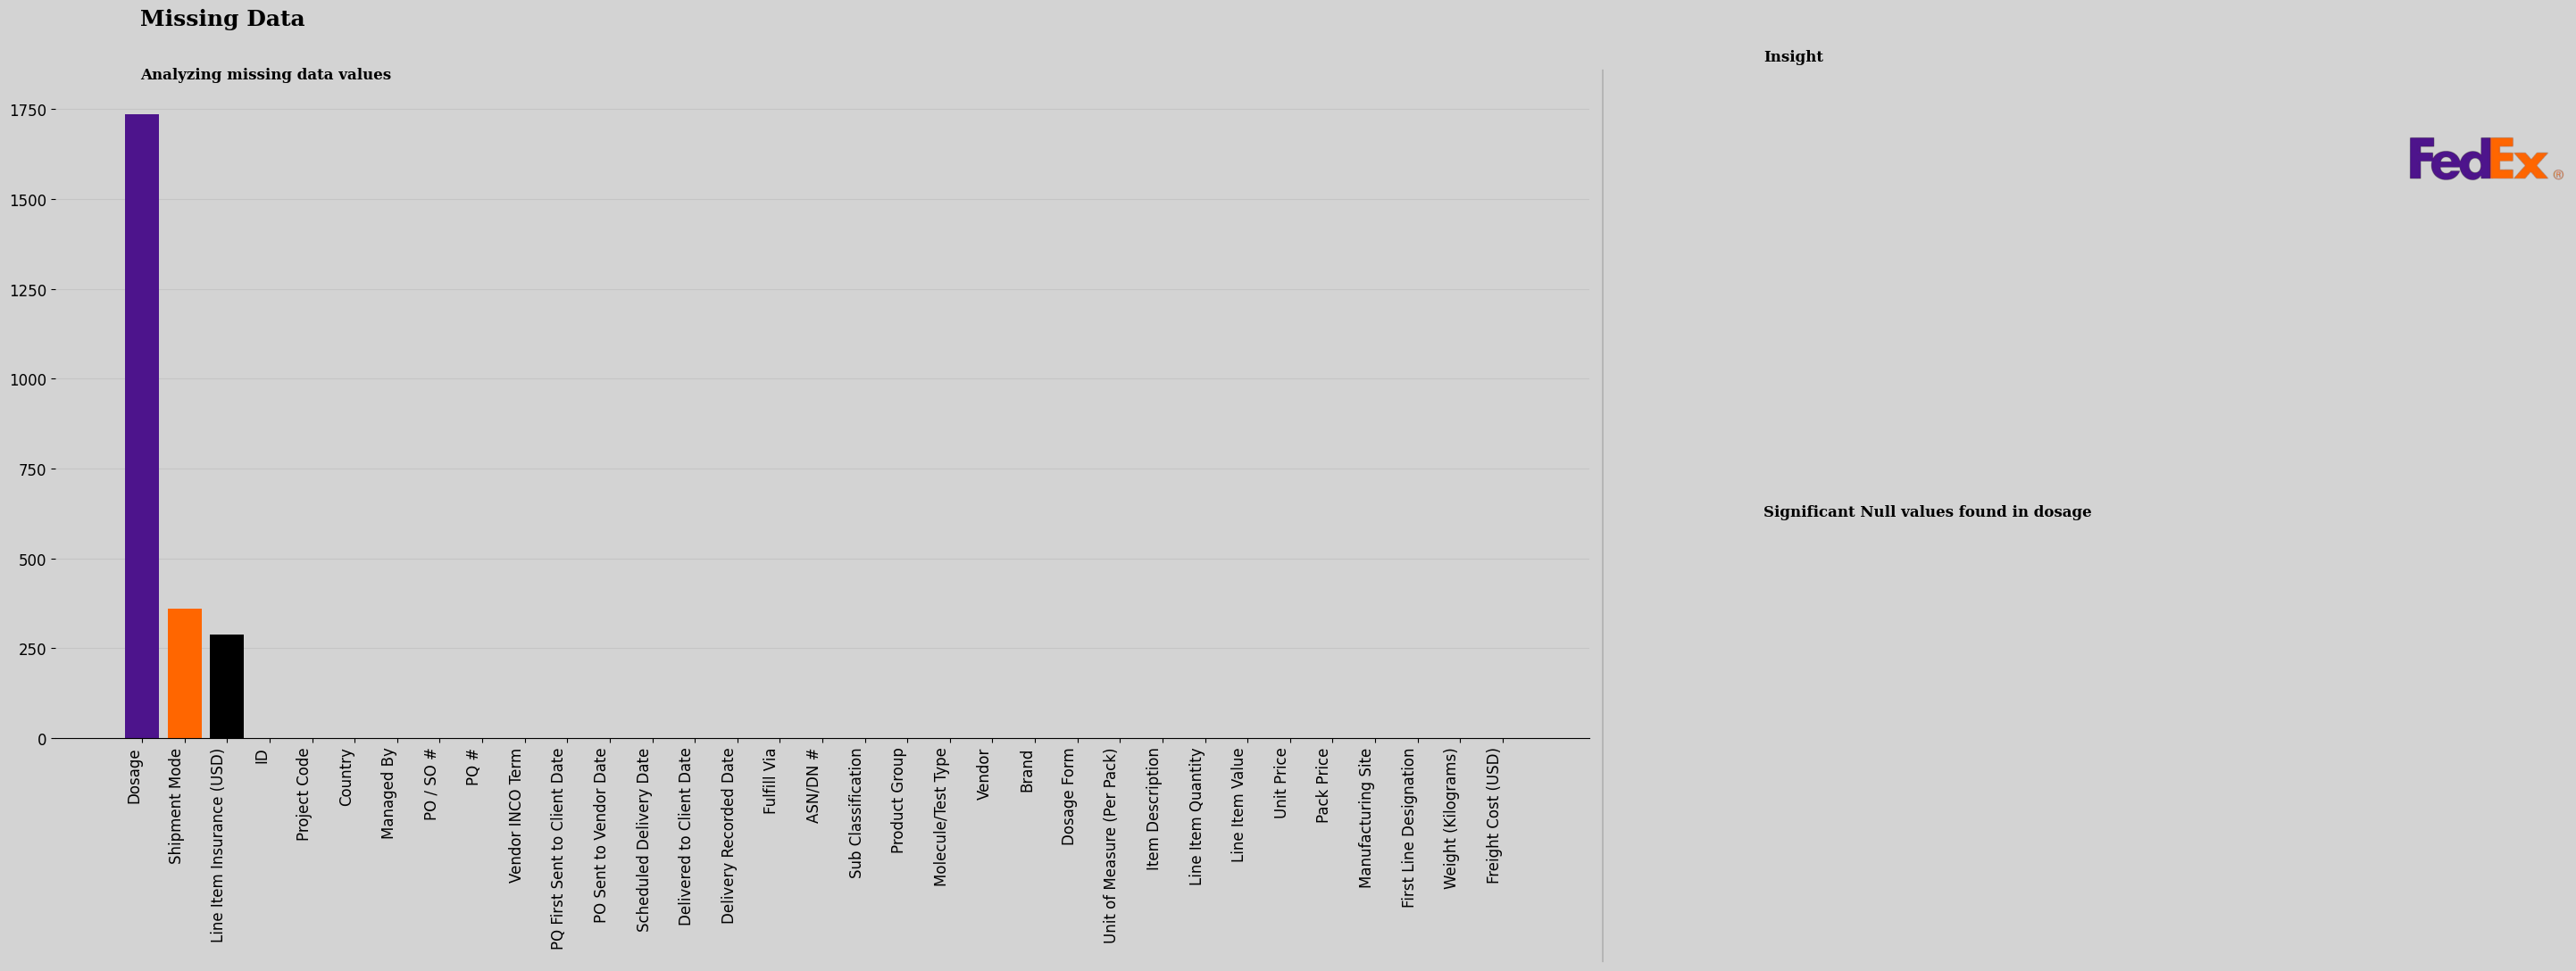

In [47]:
# Visualizing the missing values

palette = ['#4d148c', '#ff6600', '#000000','#ffffff']

missing_data = fed_df.isnull().sum().sort_values(ascending = False)

fig,ax = plt.subplots(1,1,figsize=(18,10))

bars = ax.bar(missing_data.index,missing_data.values,color = palette)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, ha = 'right')

apply_chart_styling(ax = ax, fig = fig, title = 'Missing Data' , subtitle = 'Analyzing missing data values', insight_text = '''Significant Null values found in dosage''')

plt.tight_layout()
plt.show()

### What did you know about your dataset?

The FedEx dataset comprises 10,324 records across 33 columns, capturing a wide range of procurement and logistics-related information. It includes identifiers such as project codes, purchase order numbers, and shipment IDs, along with operational details like shipment modes, vendor terms, and delivery timelines. Key numerical attributes cover line item quantities, unit prices, and freight costs, which are essential for cost and performance analysis. A few columns, including Shipment Mode and Dosage, contain missing values, while most fields are largely complete. Additionally, variables such as Weight (Kilograms) and Freight Cost (USD) are stored as object types and require conversion for quantitative analysis. Overall, the dataset provides a comprehensive foundation for analyzing procurement efficiency and supply chain performance.

## ***2. Understanding Your Variables***

In [48]:
# Dataset Columns
fed_df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [49]:
# Dataset Describe
fed_df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


### Variables Description

#### 📌 Variable Description

The dataset includes variables related to procurement, shipment, and logistics operations, enabling a comprehensive analysis of supply chain performance.

1. **Identification & Reference Variables:**  
Project Code, Purchase Order Number, Item ID, and Shipment Number uniquely identify procurement and shipment records.

2. **Product & Procurement Details:**  
Item Description, Dosage, Line Item Quantity, Unit Price, and Line Item Value describe the purchased items and their associated costs.

3. **Logistics & Transportation Variables:**  
Shipment Mode, Vendor Terms, Freight Cost (USD), and Weight (Kilograms) capture transportation methods, contractual terms, and shipping expenses.

4. **Geographical Variables:**  
Country, Region, and destination-related fields indicate shipment locations and routing information.

5. **Timeline & Delivery Variables:**  
Scheduled Delivery Date and Actual Delivery Date are used to evaluate delivery timelines, delays, and overall shipment performance.

Overall, these variables support analysis of **delivery efficiency, cost optimization, shipment delays, and operational effectiveness** within the supply chain.


### Check Unique Values for each variable.

In [50]:
# Check Unique Values for each variable.
for col in fed_df:
    print(f"{col} : {len(fed_df[col].unique())}")

ID : 10324
Project Code : 142
PQ # : 1237
PO / SO # : 6233
ASN/DN # : 7030
Country : 43
Managed By : 4
Fulfill Via : 2
Vendor INCO Term : 8
Shipment Mode : 5
PQ First Sent to Client Date : 765
PO Sent to Vendor Date : 897
Scheduled Delivery Date : 2006
Delivered to Client Date : 2093
Delivery Recorded Date : 2042
Product Group : 5
Sub Classification : 6
Vendor : 73
Item Description : 184
Molecule/Test Type : 86
Brand : 48
Dosage : 55
Dosage Form : 17
Unit of Measure (Per Pack) : 31
Line Item Quantity : 5065
Line Item Value : 8741
Pack Price : 1175
Unit Price : 183
Manufacturing Site : 88
First Line Designation : 2
Weight (Kilograms) : 4688
Freight Cost (USD) : 6733
Line Item Insurance (USD) : 6723


## 3. ***Data Wrangling***

### Data Wrangling Code

In [51]:
# Step 1: Select relevant columns for logistics and procurement analysis
fed_ex = fed_df[[
    'ID',
    'Country',
    'Managed By',
    'Fulfill Via',
    'Shipment Mode',
    'PQ First Sent to Client Date',
    'PO Sent to Vendor Date',
    'Scheduled Delivery Date',
    'Delivered to Client Date',
    'Delivery Recorded Date',
    'Line Item Quantity',
    'Line Item Value',
    'Weight (Kilograms)',
    'Freight Cost (USD)',
    'Vendor',
    'Line Item Insurance (USD)',
    'Product Group',
    'Sub Classification'
]].copy()

# Step 1.1: Standardize column names for consistency and readability
fed_ex.rename(columns={
    'PQ First Sent to Client Date': 'pq_sent_date',
    'PO Sent to Vendor Date': 'po_sent_date',
    'Scheduled Delivery Date': 'expected_delivery_date',
    'Delivered to Client Date': 'actual_delivery_date',
    'Delivery Recorded Date': 'delivery_recorded_date',
    'Line Item Quantity': 'line_item_quantity',
    'Line Item Value': 'line_item_value',
    'Weight (Kilograms)': 'weight_kgs',
    'Freight Cost (USD)': 'freight_cost_usd',
    'Line Item Insurance (USD)': 'line_item_insurance',
    'Product Group': 'product_group',
    'Sub Classification': 'sub_classification'
}, inplace=True)


In [52]:
# Step 2: Convert delivery-related columns to datetime format
date_cols = [
    'pq_sent_date',
    'po_sent_date',
    'expected_delivery_date',
    'actual_delivery_date',
    'delivery_recorded_date'
]

for col in date_cols:
    fed_ex[col] = pd.to_datetime(fed_ex[col], errors='coerce')


In [53]:
fed_ex['weight_kgs'].value_counts()

,count
weight_kgs,
Weight Captured Separately,1507
2,29
6,26
1,23
60,20
...,...
26603,1
2885,1
See DN-4153 (ID#:86170),1


In [54]:
# Step 3A: Resolve reference-based weight values (e.g., "See ID#")
fed_ex['original_weight'] = fed_ex['weight_kgs']

mask_weight_ref = fed_ex['weight_kgs'].astype(str).str.contains('See', na=False)

fed_ex.loc[mask_weight_ref, 'ref_id'] = (
    fed_ex.loc[mask_weight_ref, 'weight_kgs']
    .astype(str)
    .str.extract(r'ID#:(\d+)')[0]
    .astype('Int64')
)

for idx in fed_ex[mask_weight_ref].index:
    ref_id = fed_ex.at[idx, 'ref_id']
    if pd.notna(ref_id):
        match = fed_ex[fed_ex['ID'] == ref_id]
        if not match.empty:
            fed_ex.at[idx, 'weight_kgs'] = match.iloc[0]['weight_kgs']


# Clean and convert weight values to numeric
def clean_weight(val):
    try:
        return float(str(val).replace(',', '').strip())
    except:
        return np.nan

fed_ex['weight_kgs'] = fed_ex['weight_kgs'].apply(clean_weight)

# Step 3B: Resolve reference-based freight cost values (e.g., "See ID#")
fed_ex['original_freight_cost'] = fed_ex['freight_cost_usd']

mask_cost_ref = fed_ex['freight_cost_usd'].astype(str).str.contains('See', na=False)

fed_ex.loc[mask_cost_ref, 'ref_id'] = (
    fed_ex.loc[mask_cost_ref, 'freight_cost_usd']
    .astype(str)
    .str.extract(r'ID#:(\d+)')[0]
    .astype('Int64')
)

for idx in fed_ex[mask_cost_ref].index:
    ref_id = fed_ex.at[idx, 'ref_id']
    if pd.notna(ref_id):
        match = fed_ex[fed_ex['ID'] == ref_id]
        if not match.empty:
            fed_ex.at[idx, 'freight_cost_usd'] = match.iloc[0]['freight_cost_usd']


# Clean and convert freight cost values to numeric
def clean_freight_cost(val):
    try:
        return float(str(val).replace(',', '').strip())
    except:
        return np.nan

fed_ex['freight_cost_usd'] = fed_ex['freight_cost_usd'].apply(clean_freight_cost)


In [55]:
# Step 4.1: Enforce numeric data types
numeric_cols = [
    'line_item_quantity',
    'line_item_value',
    'weight_kgs',
    'freight_cost_usd',
    'line_item_insurance'
]

for col in numeric_cols:
    fed_ex[col] = pd.to_numeric(fed_ex[col], errors='coerce')


# Step 4.2: Handle missing values using logical business assumptions

# Missing insurance implies no insurance cost
fed_ex['line_item_insurance'] = fed_ex['line_item_insurance'].fillna(0)

# Impute missing freight cost with dataset mean (EDA-level assumption)
fed_ex['freight_cost_usd'] = fed_ex['freight_cost_usd'].fillna(
    fed_ex['freight_cost_usd'].mean()
)

# Impute missing weight using product-level averages
fed_ex['weight_kgs'] = fed_ex['weight_kgs'].fillna(
    fed_ex.groupby(['product_group', 'sub_classification'])['weight_kgs']
          .transform('mean')
)


In [56]:
# Step 5.1: Normalize categorical fields
fed_ex['Country'] = fed_ex['Country'].str.strip().str.title()

fed_ex['Shipment Mode'] = fed_ex['Shipment Mode'].fillna(
    fed_ex['Shipment Mode'].mode()[0]
)

# Step 5.2: Remove duplicates and temporary helper columns
fed_ex.drop_duplicates(inplace=True)

fed_ex.drop(
    columns=['ref_id', 'original_weight', 'original_freight_cost'],
    errors='ignore',
    inplace=True
)

# Final structure check
fed_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      10324 non-null  int64         
 1   Country                 10324 non-null  object        
 2   Managed By              10324 non-null  object        
 3   Fulfill Via             10324 non-null  object        
 4   Shipment Mode           10324 non-null  object        
 5   pq_sent_date            7643 non-null   datetime64[ns]
 6   po_sent_date            4592 non-null   datetime64[ns]
 7   expected_delivery_date  10324 non-null  datetime64[ns]
 8   actual_delivery_date    10324 non-null  datetime64[ns]
 9   delivery_recorded_date  10324 non-null  datetime64[ns]
 10  line_item_quantity      10324 non-null  int64         
 11  line_item_value         10324 non-null  float64       
 12  weight_kgs              10324 non-null  float6

### **What all manipulations have you done and insights you found?**

#### Data Manipulations Performed and Key Insights

1. **Data Cleaning and Standardization:**  
   Selected relevant procurement and logistics variables, standardized column names, and converted date and numeric fields into appropriate formats to support delivery timeline and cost analysis.

2. **Resolution of Reference-Based Values:**  
   Resolved indirect references (e.g., “See ID#”) in shipment weight and freight cost fields by mapping them to corresponding records, ensuring accuracy in cost and weight-related insights.

3. **Handling Missing Values:**  
   Addressed missing values using logical assumptions suitable for EDA, such as treating missing insurance costs as zero, imputing freight costs with the dataset mean, and estimating missing weights using product-level averages.

4. **Categorical Normalization and Deduplication:**  
   Normalized categorical variables like country names and shipment modes for consistency, and removed duplicate records and temporary helper columns to maintain a clean dataset.

**Key Insight:**  
These preprocessing steps improved data completeness and consistency, enabling reliable analysis of delivery performance, lead times, and freight cost behavior across shipment modes and regions.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Feature Engineering

In [57]:
# Delivery delay in days
fed_ex['delivery_delay_days'] = (
    fed_ex['actual_delivery_date'] - fed_ex['expected_delivery_date']
).dt.days

# On-time vs delayed flag
fed_ex['delivery_status'] = np.where(
    fed_ex['delivery_delay_days'] <= 0, 'On Time', 'Delayed'
)

# Freight cost per kg (cost efficiency)
fed_ex['freight_cost_per_kg'] = (
    fed_ex['freight_cost_usd'] / fed_ex['weight_kgs']
)

### Univariate Analysis

Shipment Mode Distribution (Pie Chart)

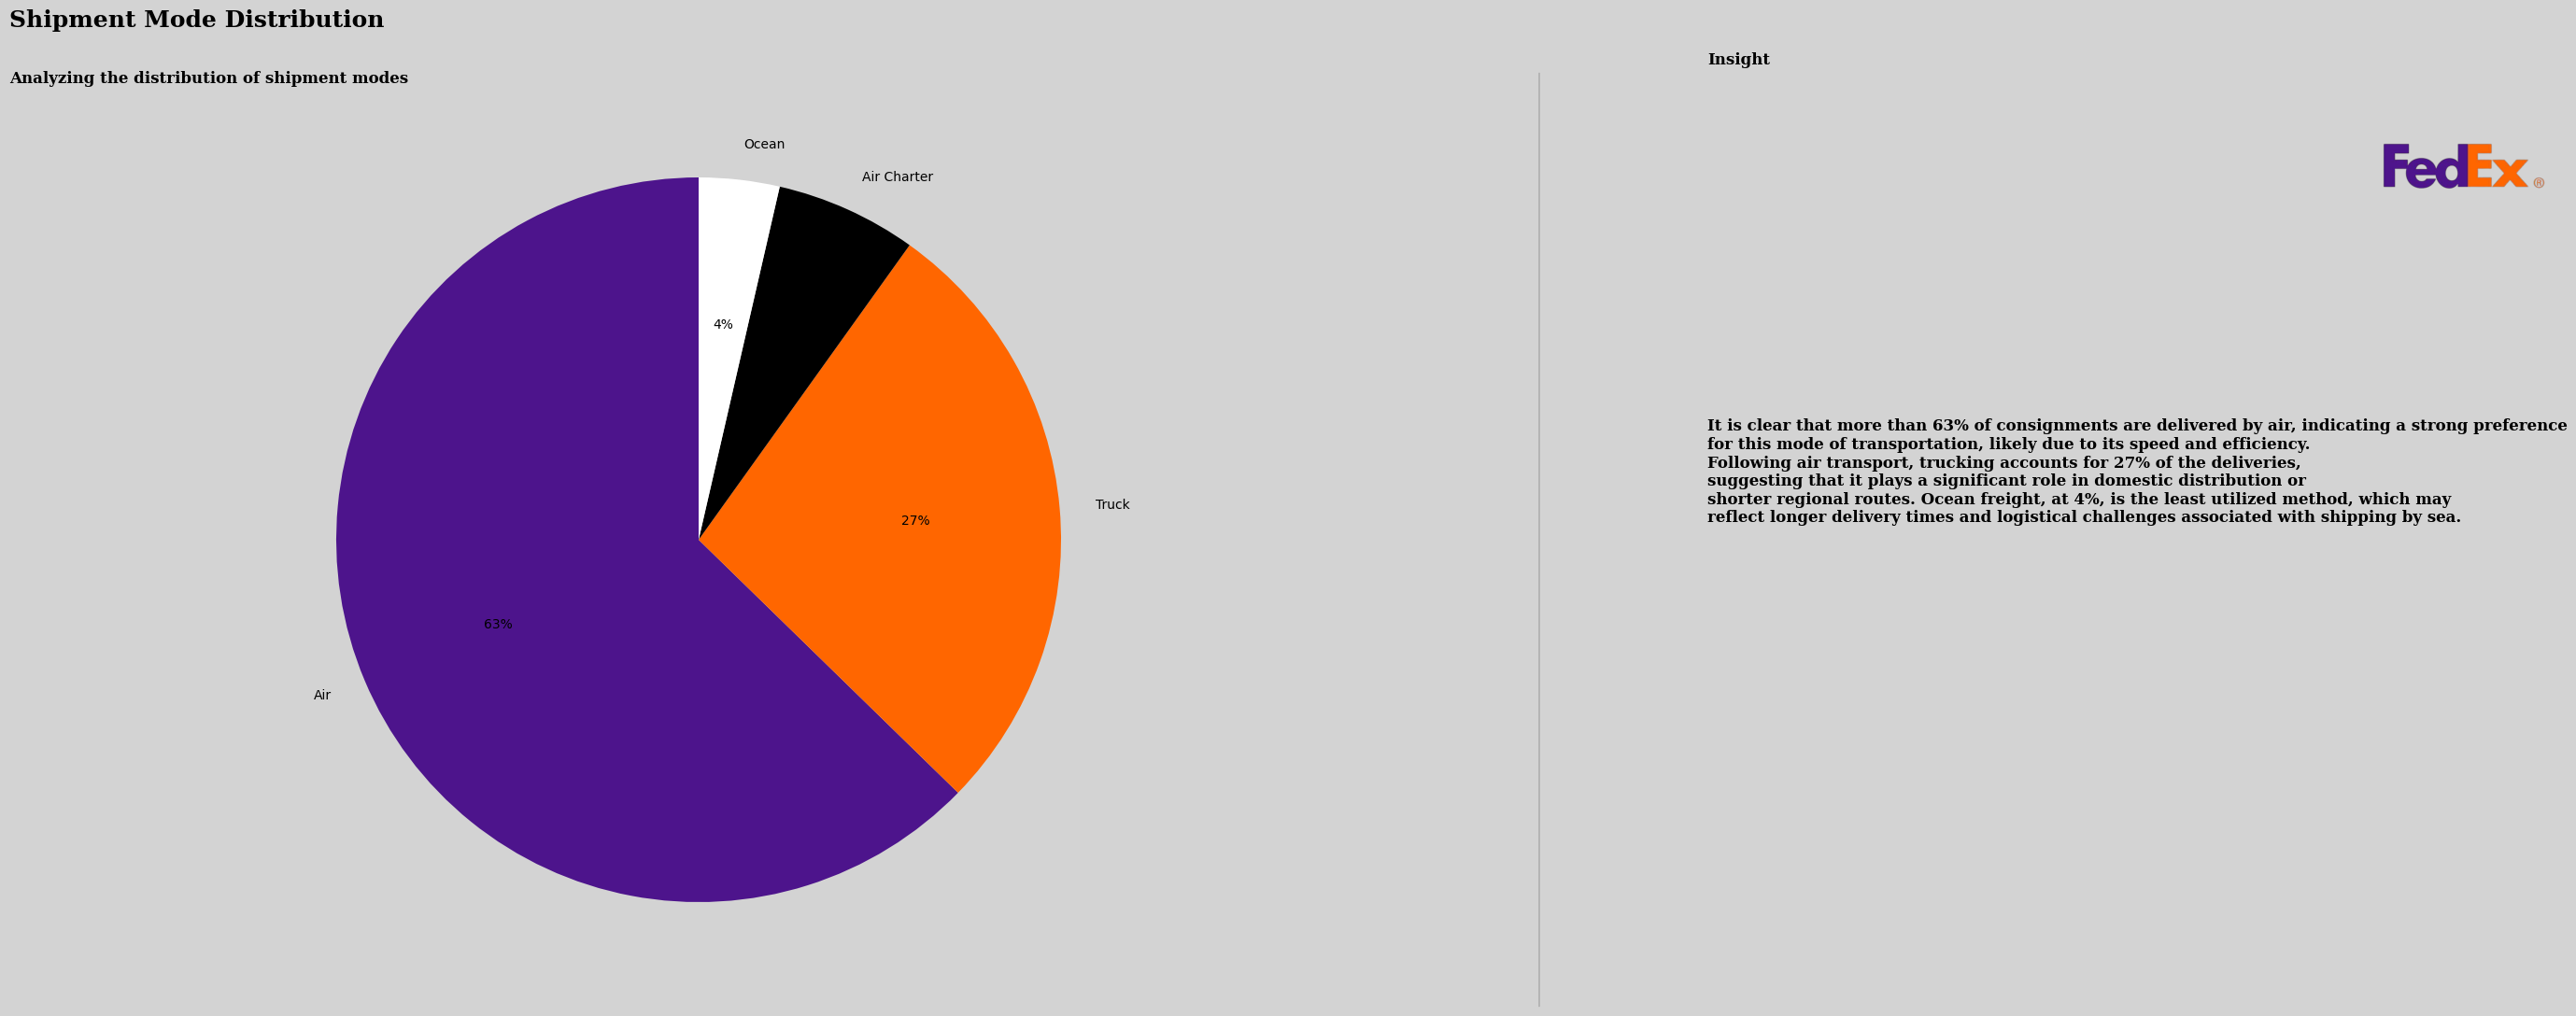

In [58]:
shipment_mode_counts = fed_ex['Shipment Mode'].value_counts()

# Create the pie chart
fig, ax = plt.subplots(figsize=(18, 10))

explode = [0.1 if i == 1 else 0 for i in range(len(shipment_mode_counts))]

# Plot the pie chart
ax.pie(shipment_mode_counts,
       labels=shipment_mode_counts.index,
       colors=palette,
       autopct='%.0f%%',
       startangle=90)

# Apply chart styling
apply_chart_styling(ax=ax, fig=fig, title='Shipment Mode Distribution', subtitle='Analyzing the distribution of shipment modes', insight_text='''It is clear that more than 63% of consignments are delivered by air, indicating a strong preference
for this mode of transportation, likely due to its speed and efficiency.
Following air transport, trucking accounts for 27% of the deliveries,
suggesting that it plays a significant role in domestic distribution or
shorter regional routes. Ocean freight, at 4%, is the least utilized method, which may
reflect longer delivery times and logistical challenges associated with shipping by sea.
''')

# Display the chart
plt.tight_layout()
plt.show()

Country-wise Shipment Count (Top 10)

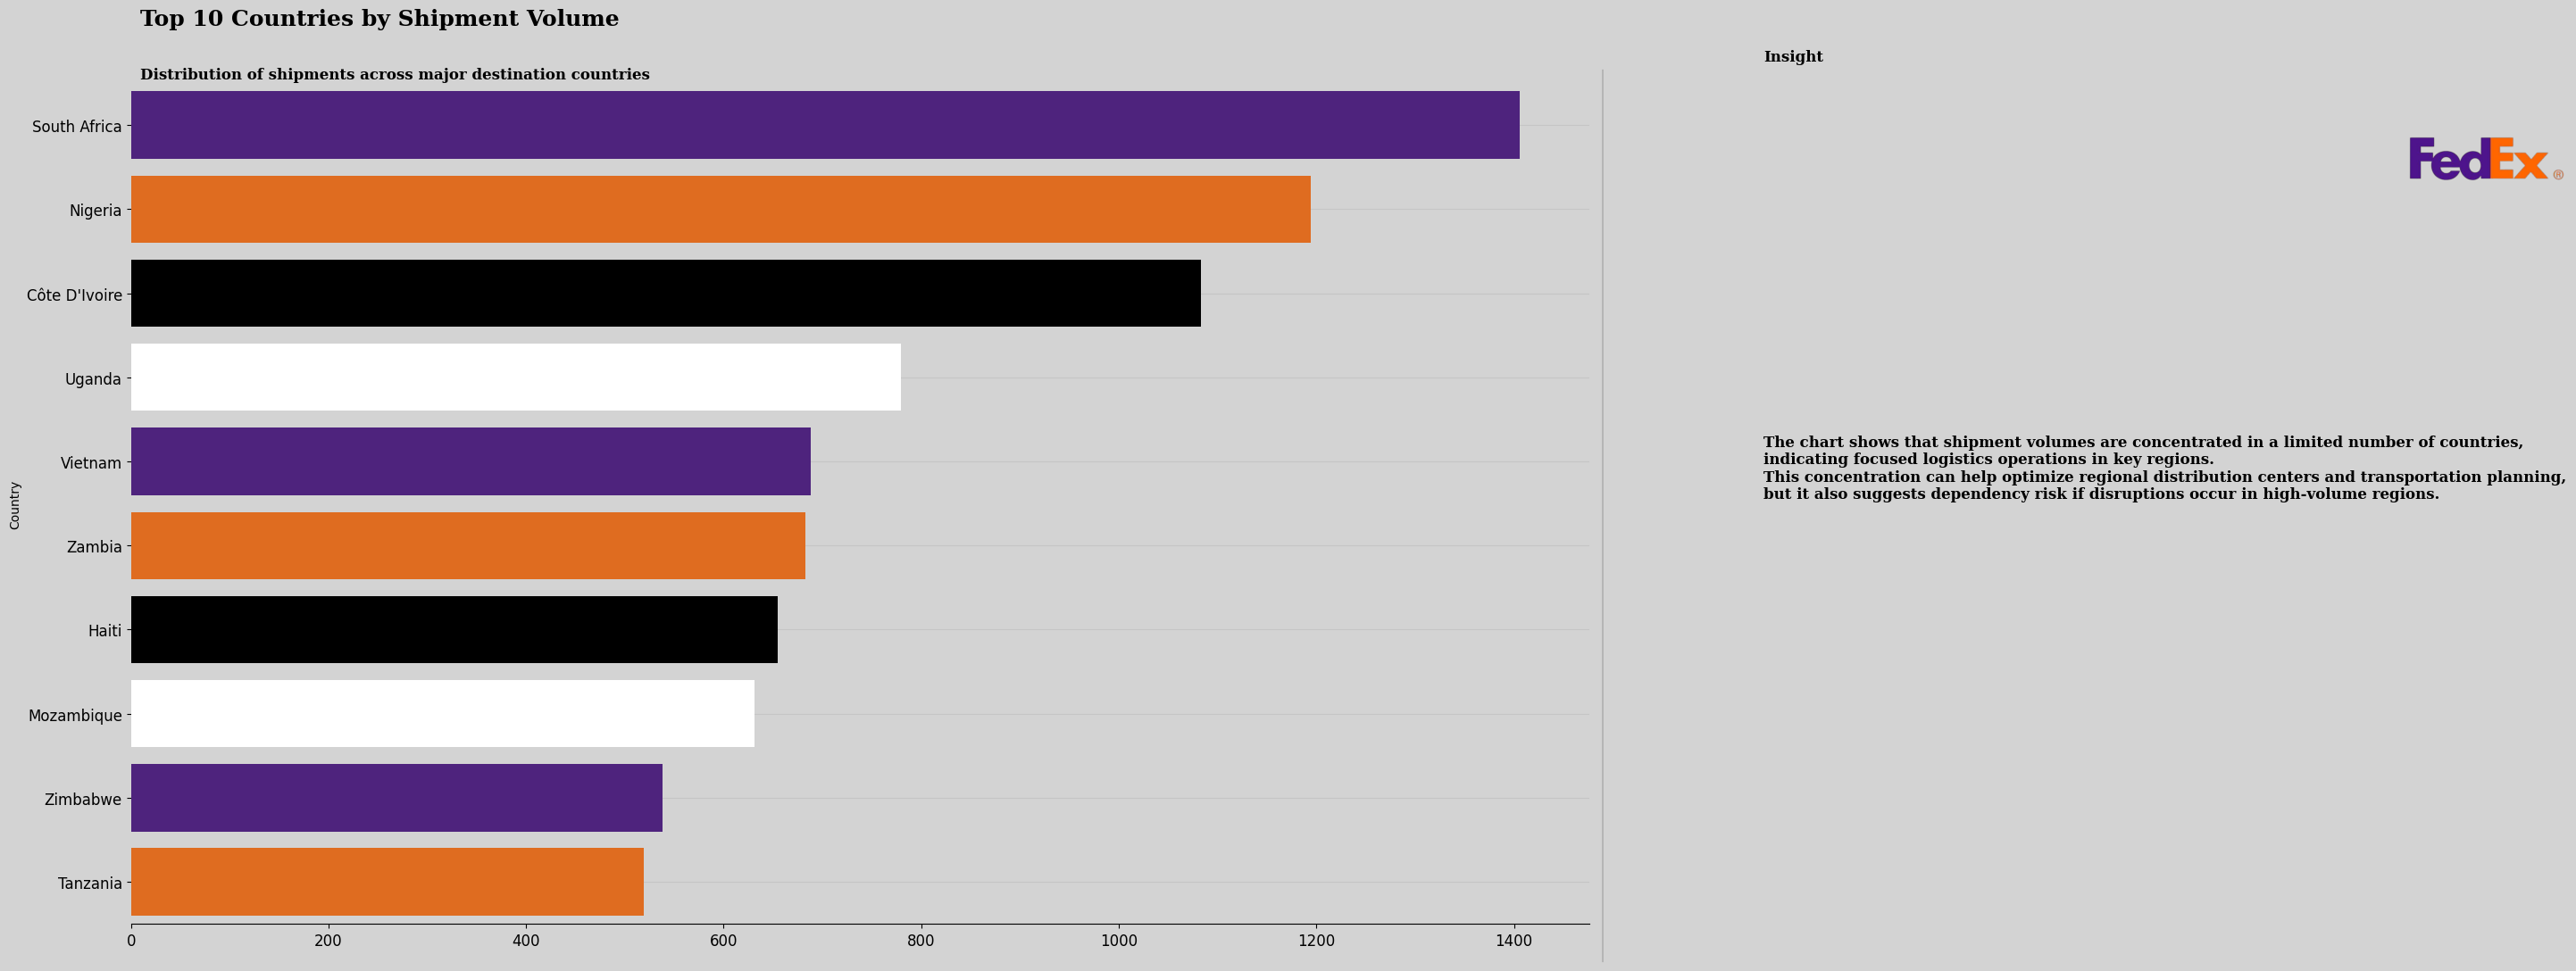

In [59]:
# Chart 2 visualization code

country_counts = fed_ex['Country'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(18, 10))

sns.barplot(
    x=country_counts.values,
    y=country_counts.index,
    palette=palette,
    ax=ax
)

apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Top 10 Countries by Shipment Volume',
    subtitle='Distribution of shipments across major destination countries',
    insight_text='''
The chart shows that shipment volumes are concentrated in a limited number of countries,
indicating focused logistics operations in key regions.
This concentration can help optimize regional distribution centers and transportation planning,
but it also suggests dependency risk if disruptions occur in high-volume regions.
'''
)

plt.tight_layout()
plt.show()

Product Group Distribution

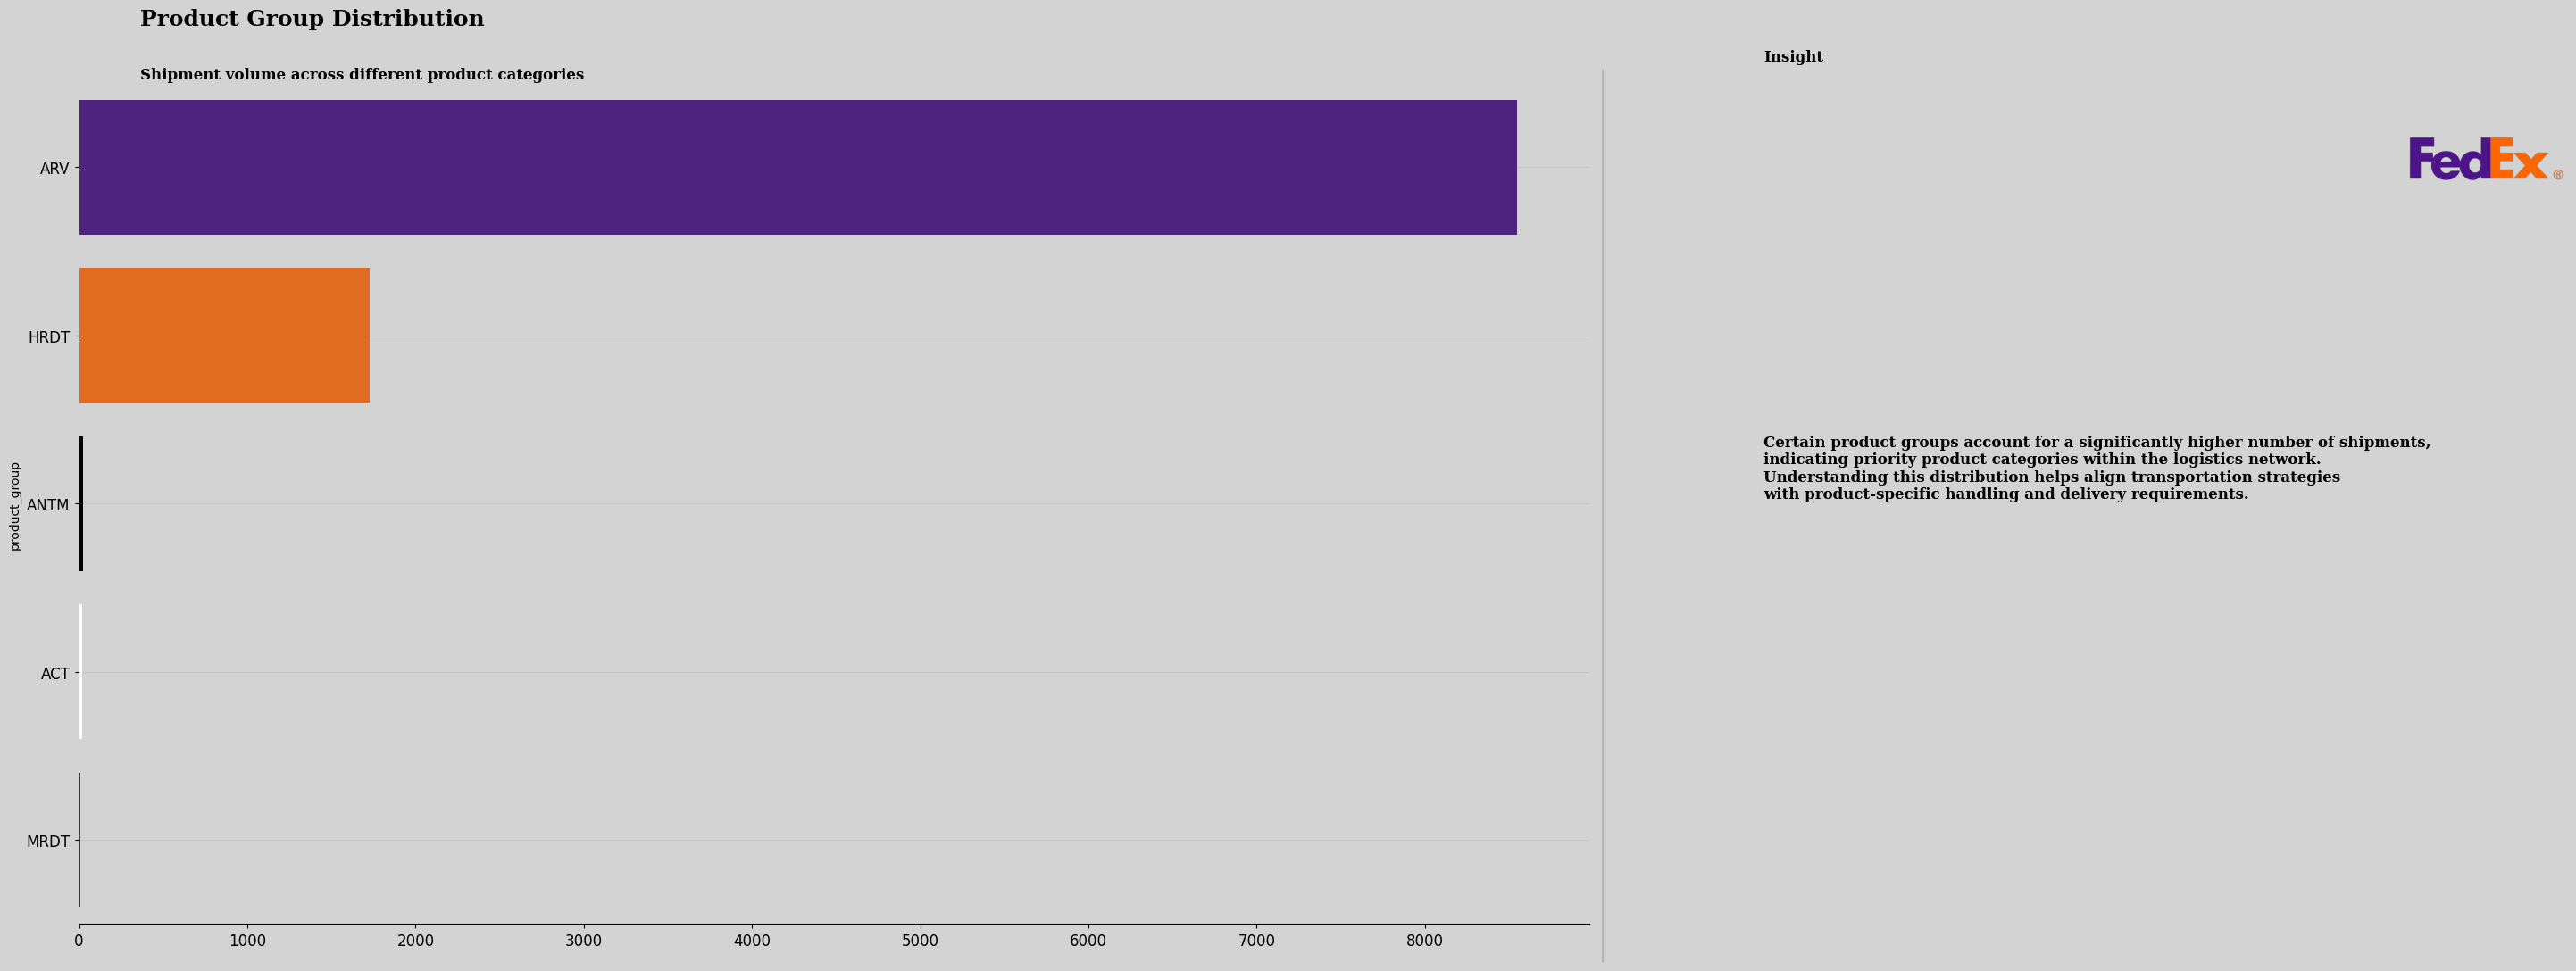

In [60]:
# Chart 3 visualization code

product_group_counts = fed_ex['product_group'].value_counts()

fig, ax = plt.subplots(figsize=(18, 10))

sns.barplot(
    x=product_group_counts.values,
    y=product_group_counts.index,
    palette=palette,
    ax=ax
)

apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Product Group Distribution',
    subtitle='Shipment volume across different product categories',
    insight_text='''
Certain product groups account for a significantly higher number of shipments,
indicating priority product categories within the logistics network.
Understanding this distribution helps align transportation strategies
with product-specific handling and delivery requirements.
'''
)

plt.tight_layout()
plt.show()

Freight Cost Distribution

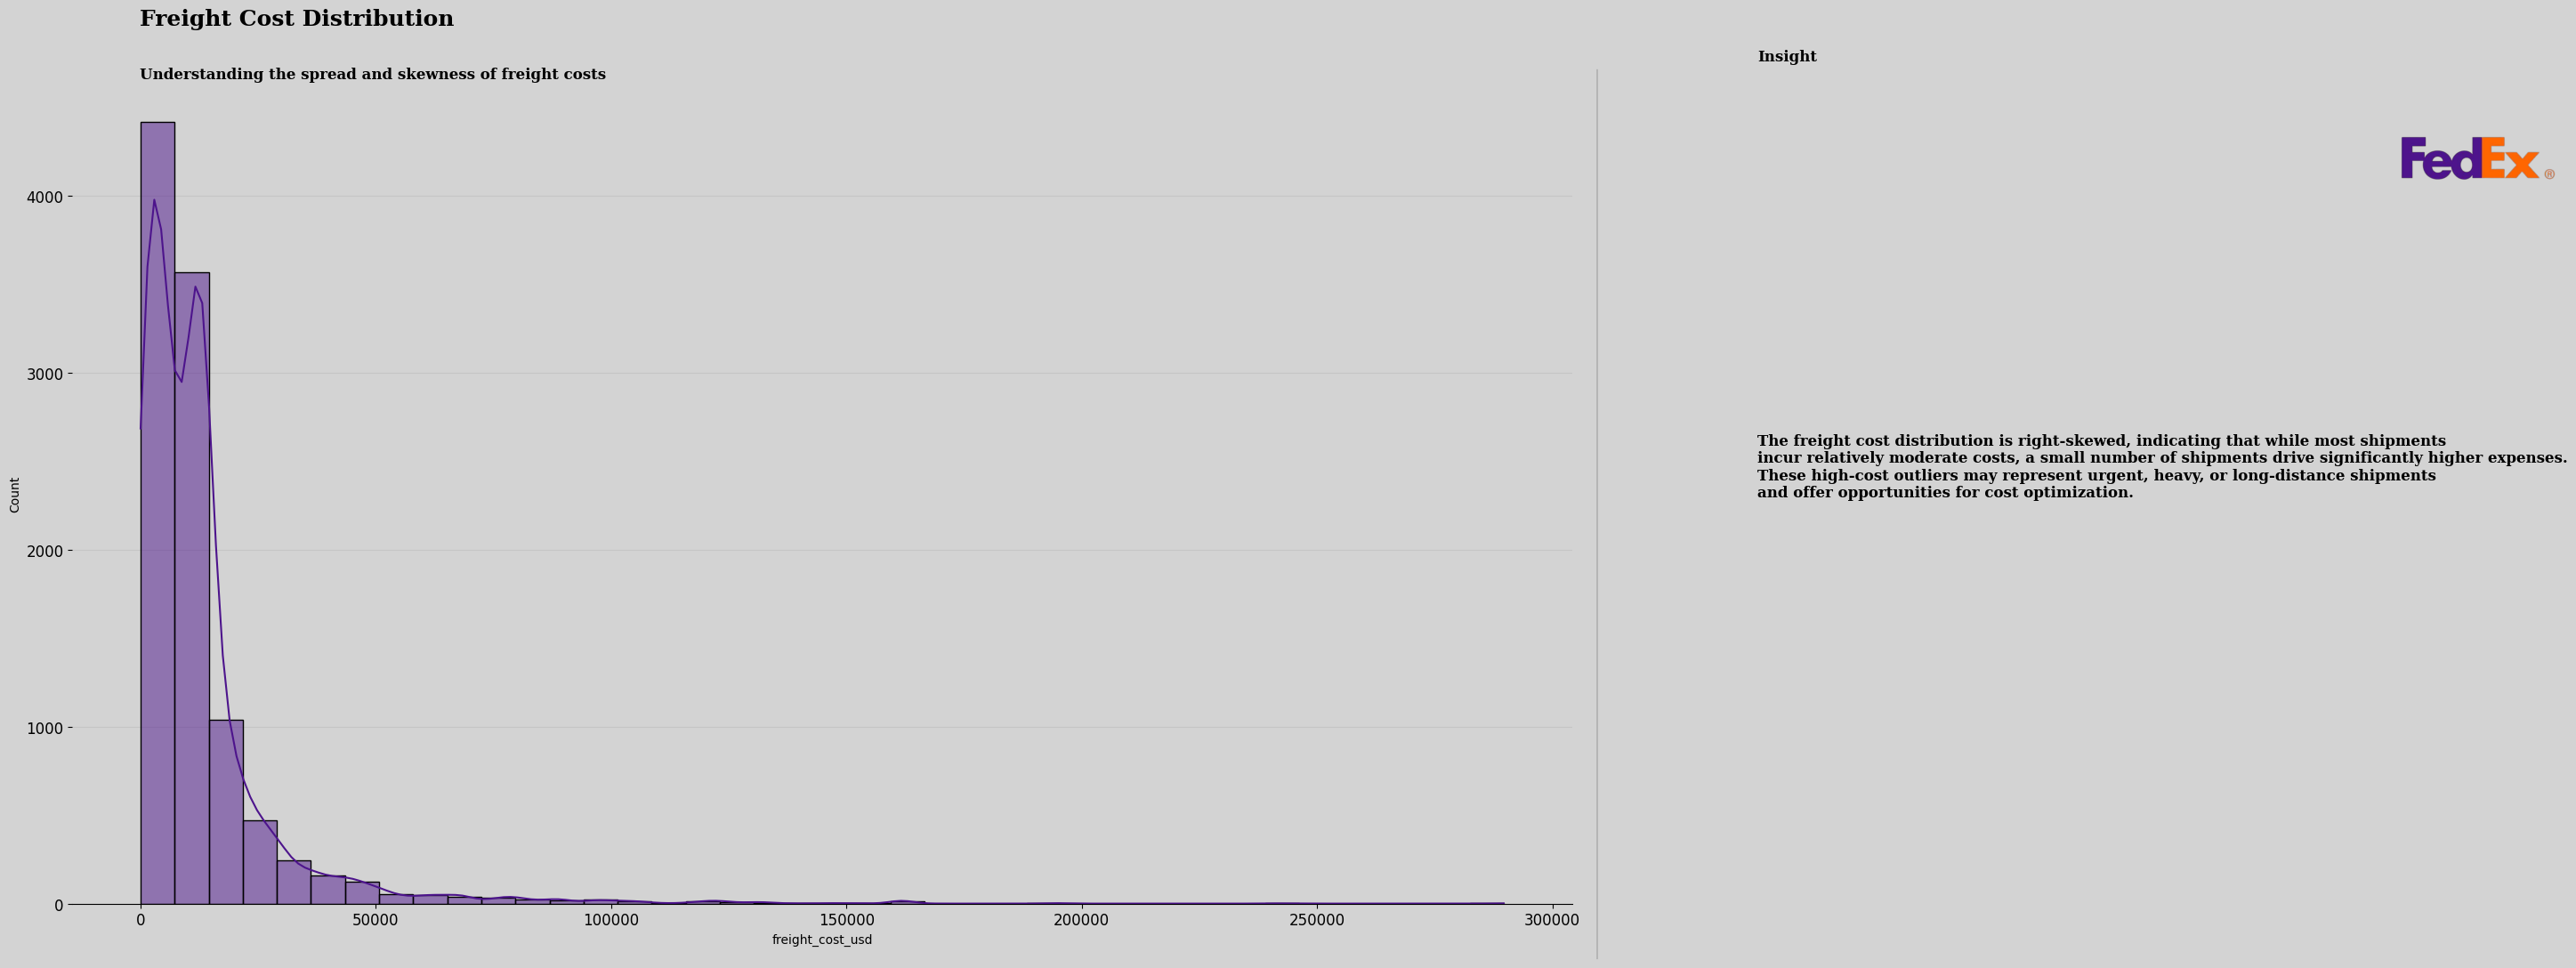

In [61]:
# Chart 4 visualization code

fig, ax = plt.subplots(figsize=(18, 10))

sns.histplot(
    fed_ex['freight_cost_usd'],
    bins=40,
    kde=True,
    color=palette[0],
    ax=ax
)

apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Freight Cost Distribution',
    subtitle='Understanding the spread and skewness of freight costs',
    insight_text='''
The freight cost distribution is right-skewed, indicating that while most shipments
incur relatively moderate costs, a small number of shipments drive significantly higher expenses.
These high-cost outliers may represent urgent, heavy, or long-distance shipments
and offer opportunities for cost optimization.
'''
)

plt.tight_layout()
plt.show()


Shipment Weight Distribution

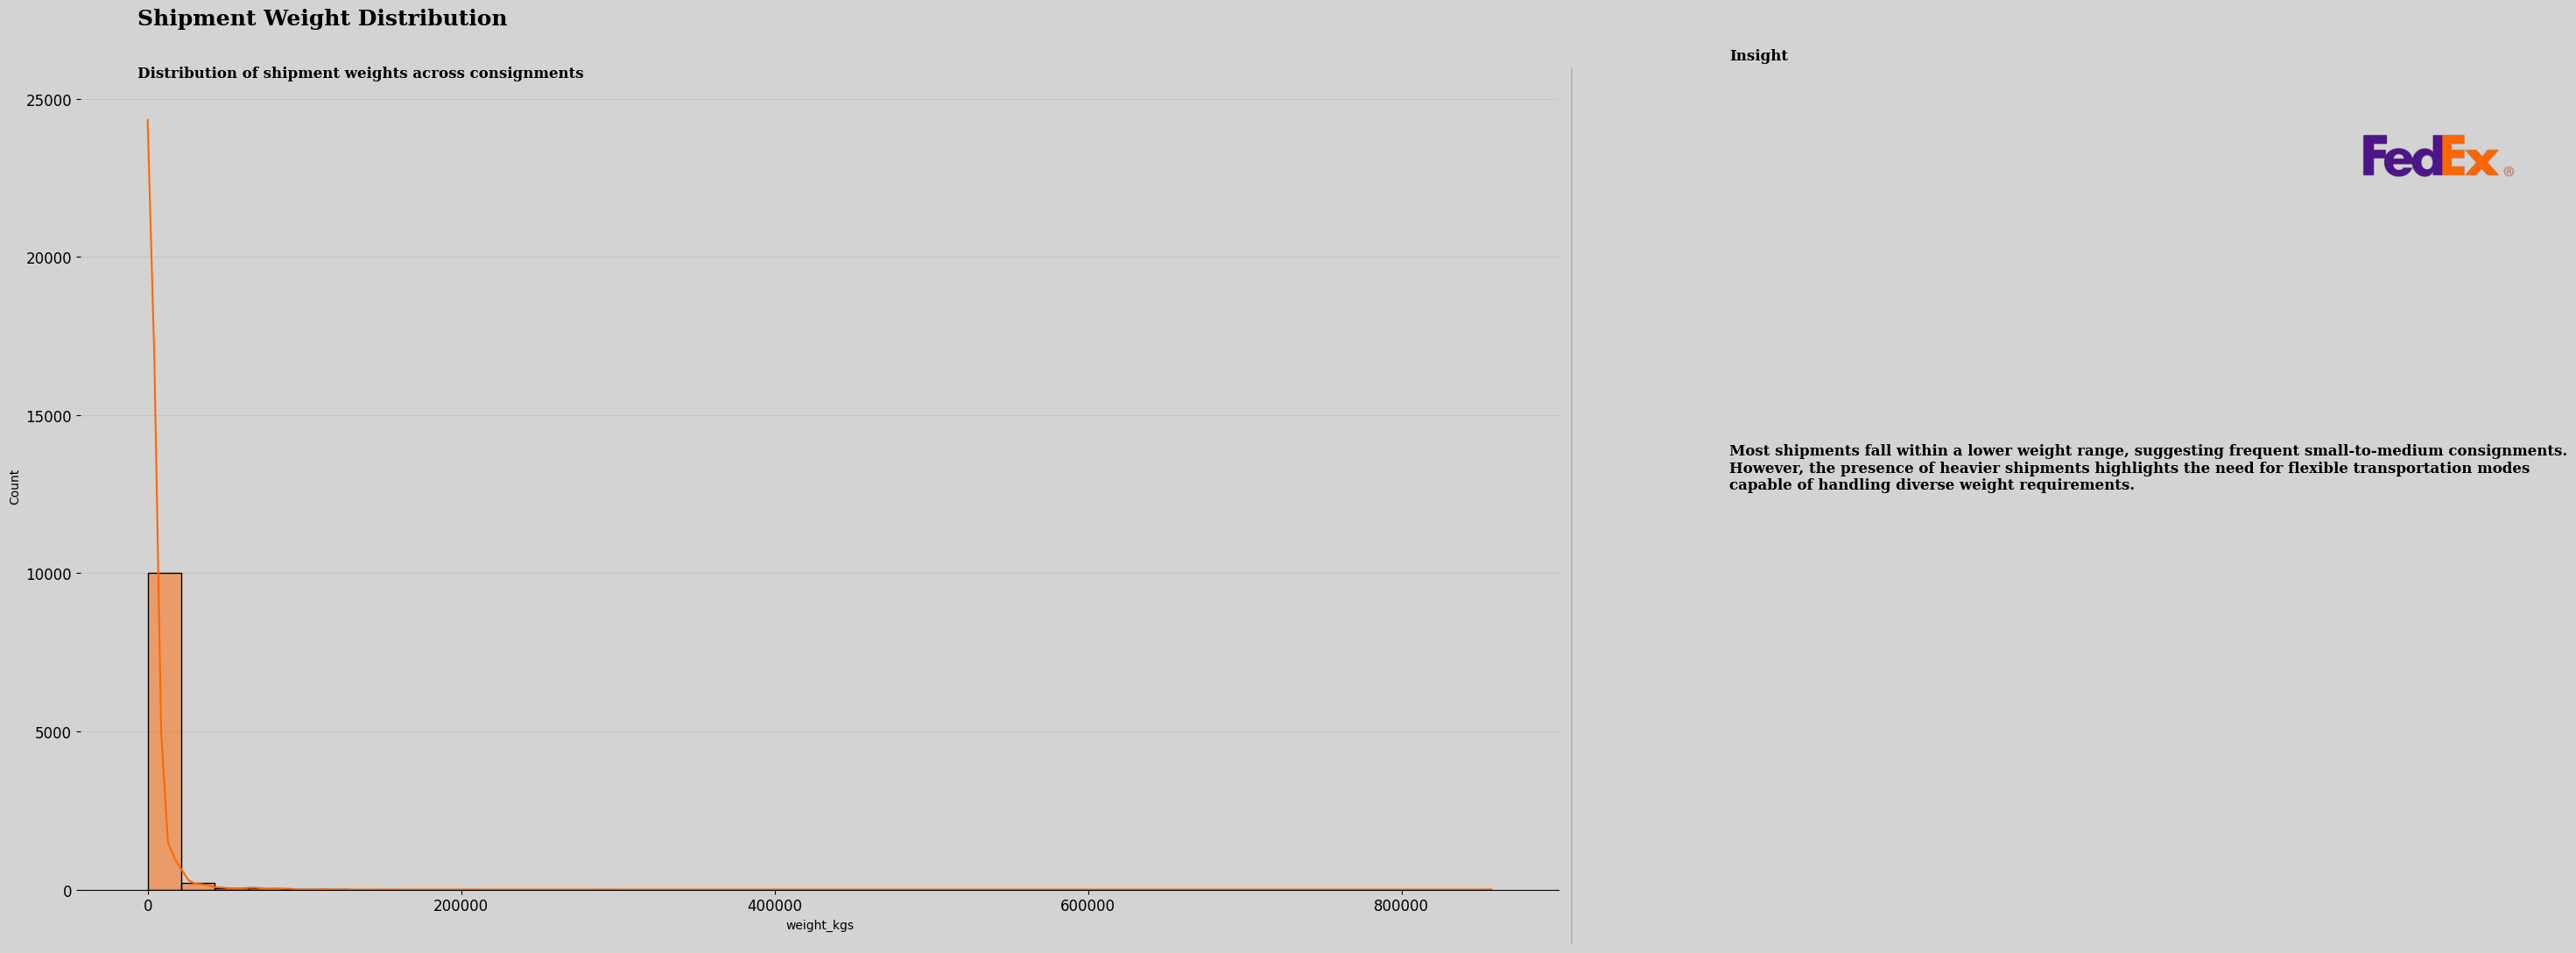

In [62]:
# Chart 5 visualization code

fig, ax = plt.subplots(figsize=(18, 10))

sns.histplot(
    fed_ex['weight_kgs'],
    bins=40,
    kde=True,
    color=palette[1],
    ax=ax
)

apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Shipment Weight Distribution',
    subtitle='Distribution of shipment weights across consignments',
    insight_text='''
Most shipments fall within a lower weight range, suggesting frequent small-to-medium consignments.
However, the presence of heavier shipments highlights the need for flexible transportation modes
capable of handling diverse weight requirements.
'''
)

plt.tight_layout()
plt.show()


Delivery Delay Distribution (Engineered Feature)

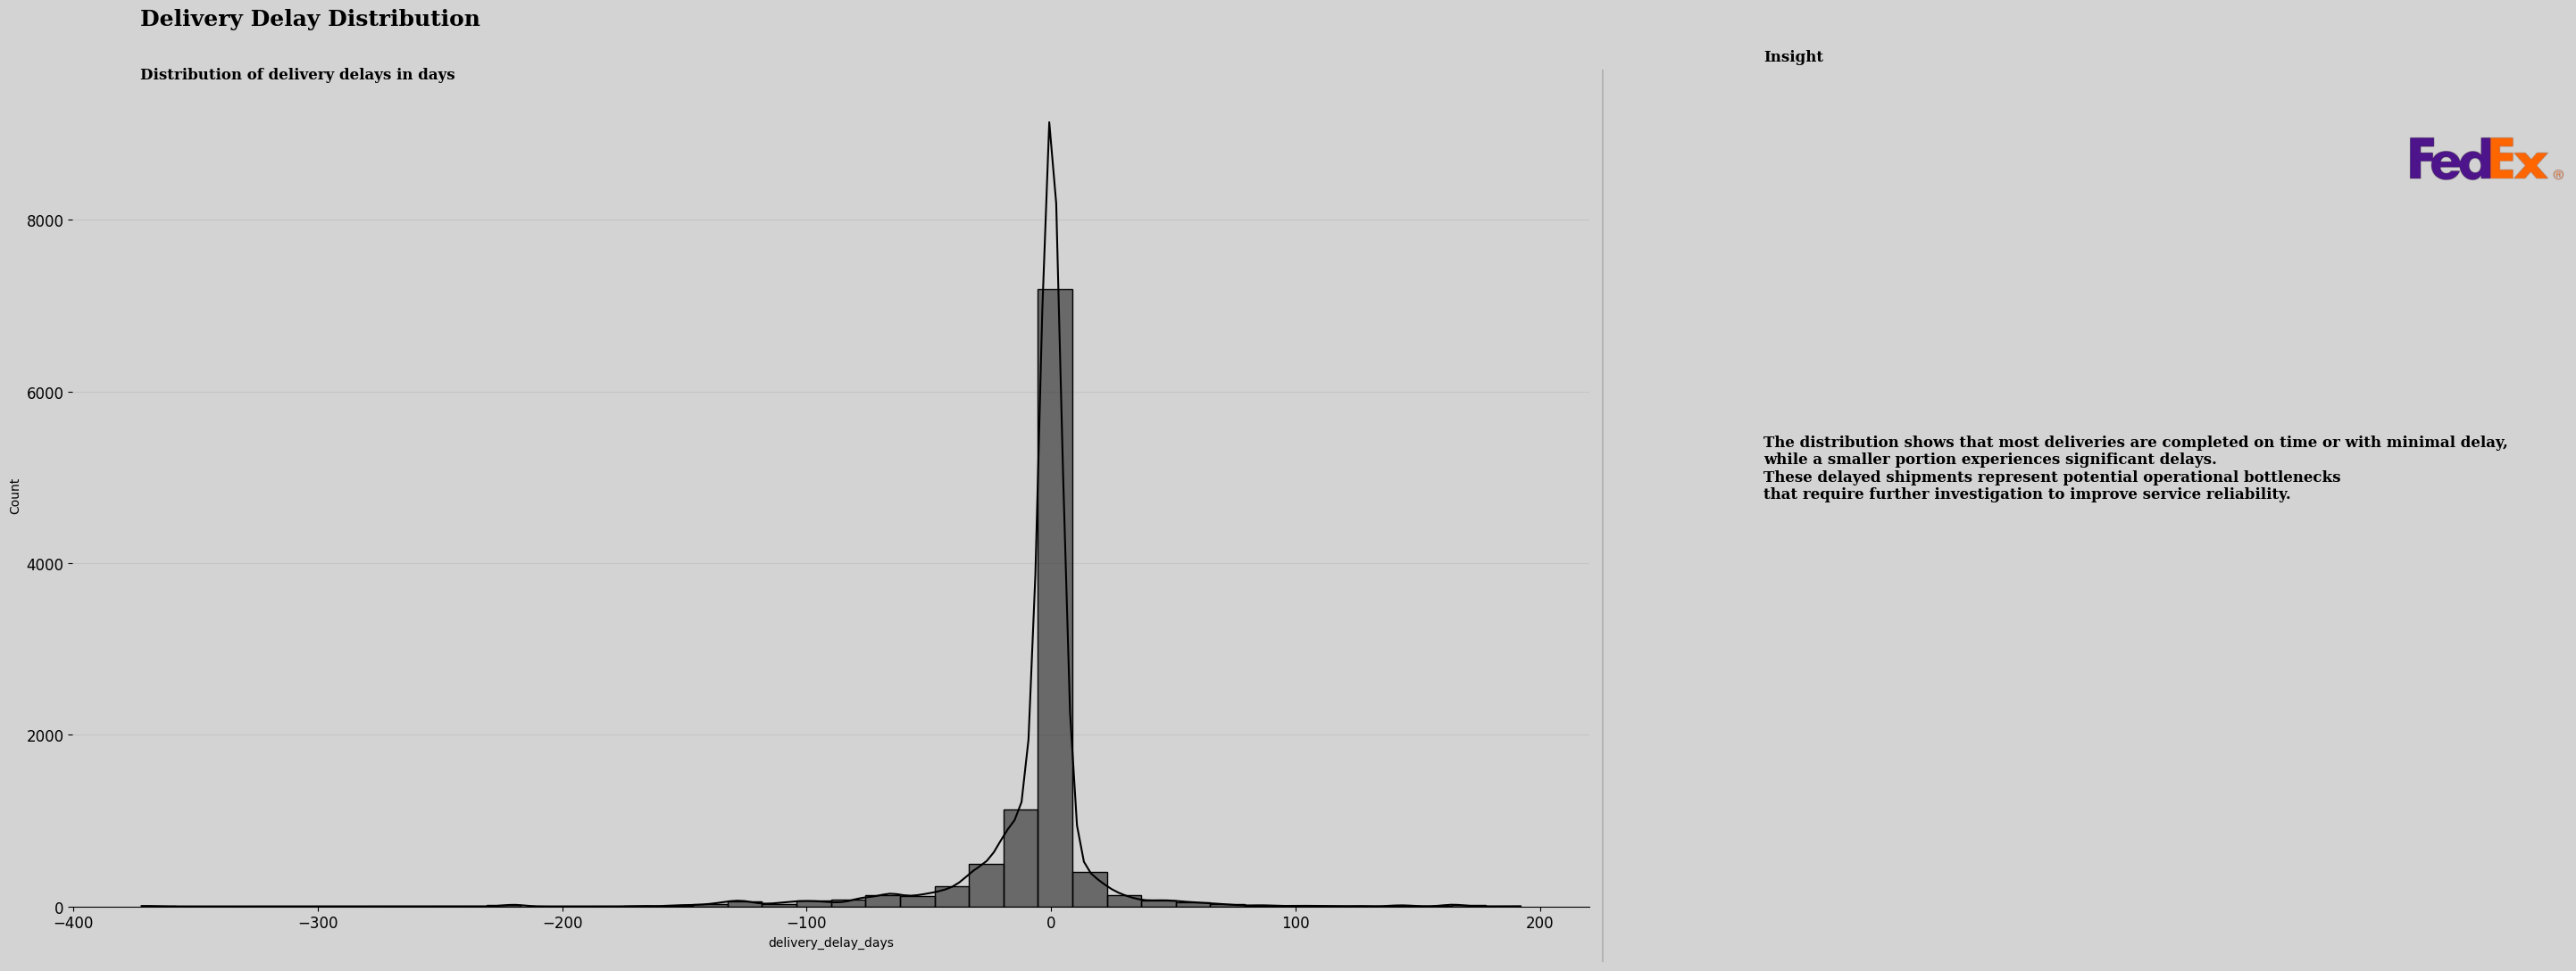

In [63]:
# Chart 6 visualization code

fig, ax = plt.subplots(figsize=(18, 10))

sns.histplot(
    fed_ex['delivery_delay_days'],
    bins=40,
    kde=True,
    color=palette[2],
    ax=ax
)

apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Delivery Delay Distribution',
    subtitle='Distribution of delivery delays in days',
    insight_text='''
The distribution shows that most deliveries are completed on time or with minimal delay,
while a smaller portion experiences significant delays.
These delayed shipments represent potential operational bottlenecks
that require further investigation to improve service reliability.
'''
)

plt.tight_layout()
plt.show()


### Bi-Variate Analysis

Weight vs Freight Cost

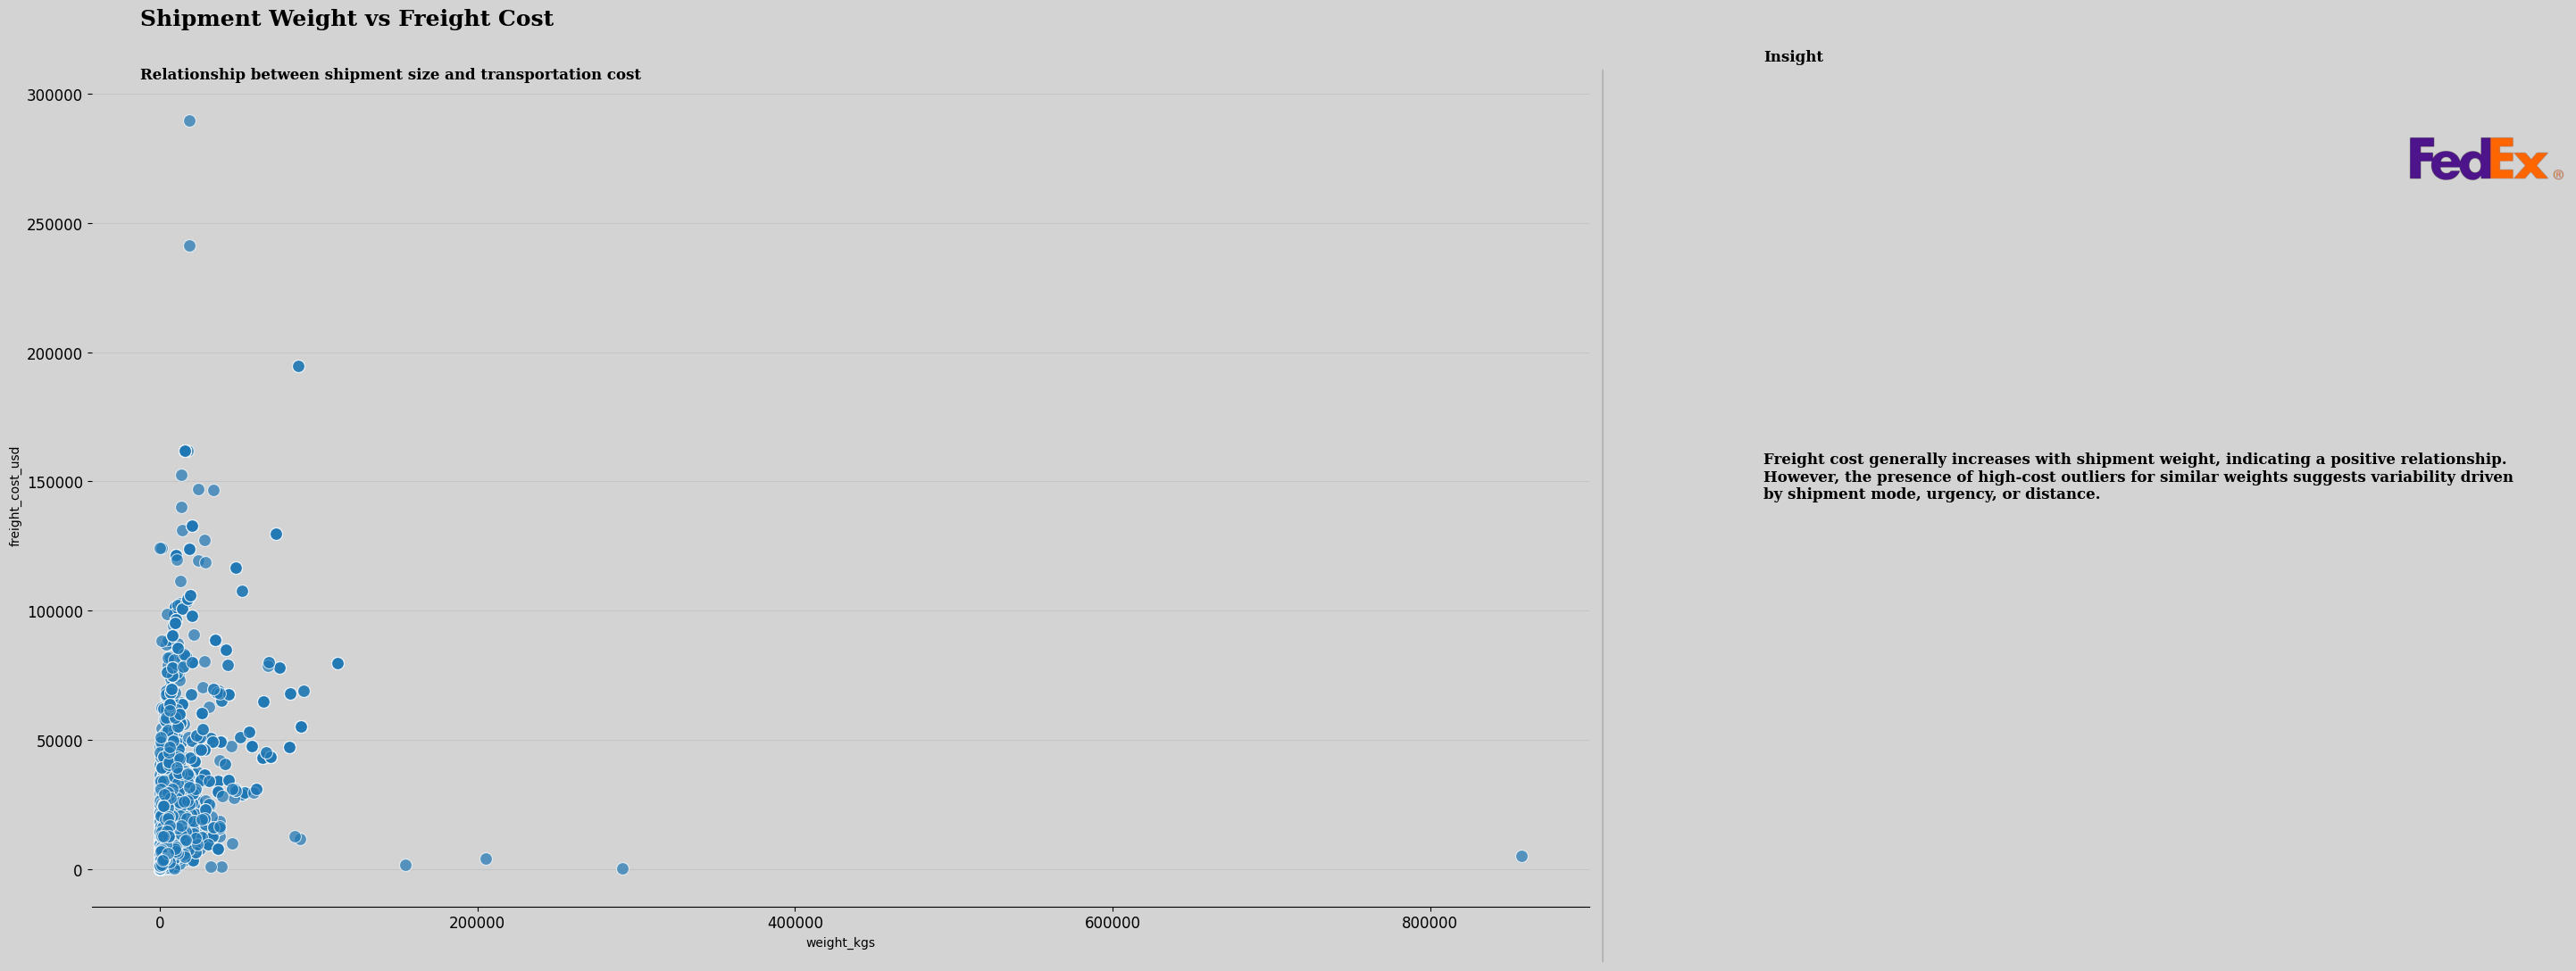

In [64]:
# Chart 7 visualization code

fig, ax = plt.subplots(figsize=(18, 10))

sns.scatterplot(
    data=fed_ex,
    x='weight_kgs',
    y='freight_cost_usd',
    alpha=0.7,
    s = 100,
    ax=ax
)

apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Shipment Weight vs Freight Cost',
    subtitle='Relationship between shipment size and transportation cost',
    insight_text='''
Freight cost generally increases with shipment weight, indicating a positive relationship.
However, the presence of high-cost outliers for similar weights suggests variability driven
by shipment mode, urgency, or distance.
'''
)

plt.tight_layout()
plt.show()

Line Item Quantity vs Freight Cost (Scatter)

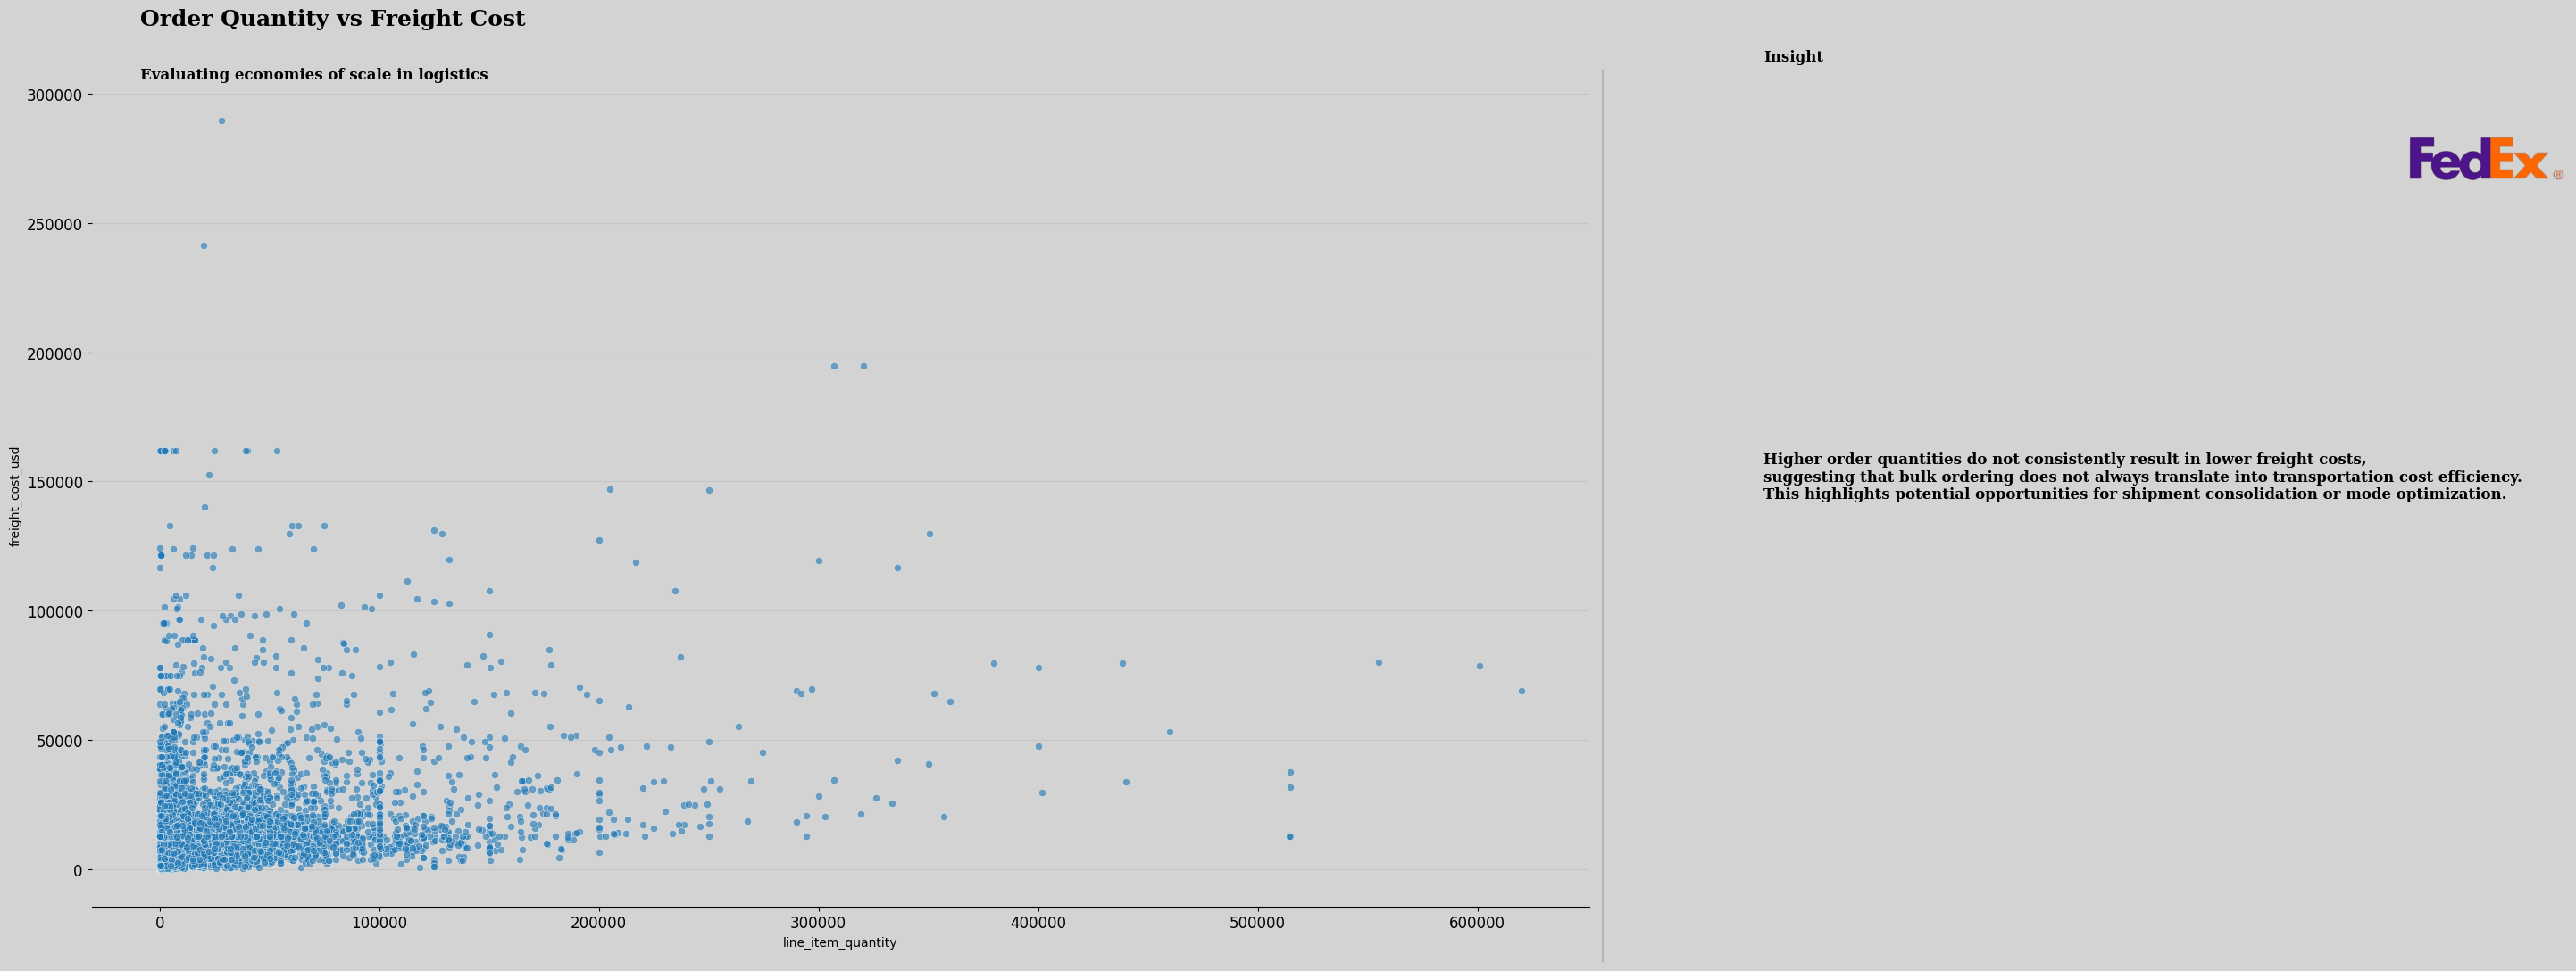

In [65]:
# Chart 8 visualization code

fig, ax = plt.subplots(figsize=(18, 10))

sns.scatterplot(
    data=fed_ex,
    x='line_item_quantity',
    y='freight_cost_usd',
    alpha=0.6,
    ax=ax
)

apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Order Quantity vs Freight Cost',
    subtitle='Evaluating economies of scale in logistics',
    insight_text='''
Higher order quantities do not consistently result in lower freight costs,
suggesting that bulk ordering does not always translate into transportation cost efficiency.
This highlights potential opportunities for shipment consolidation or mode optimization.
'''
)

plt.tight_layout()
plt.show()


Freight Cost by Shipment Mode (box plot)

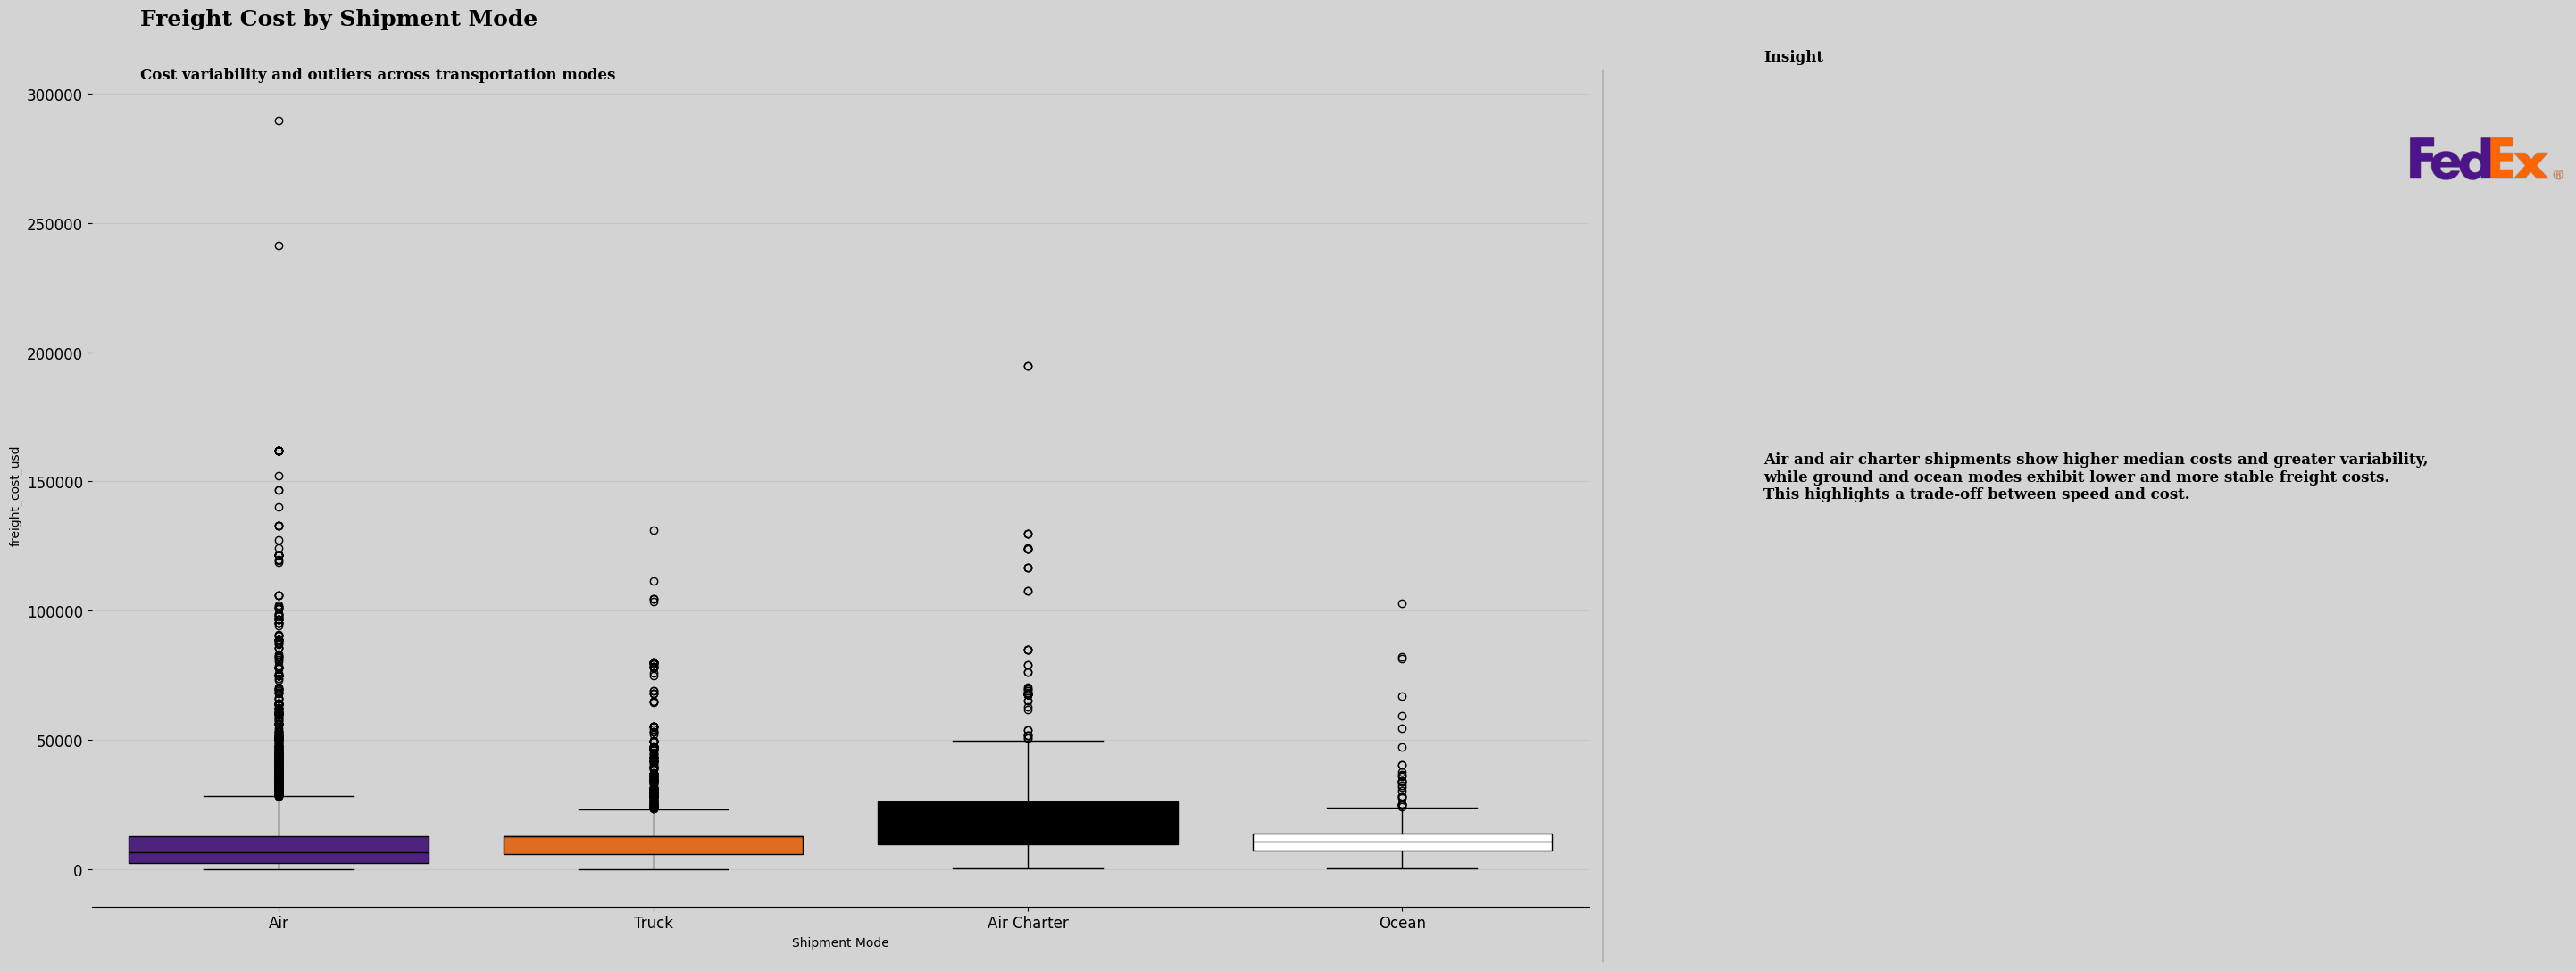

In [66]:
# Chart 10 visualization code

fig, ax = plt.subplots(figsize=(18, 10))

sns.boxplot(
    data=fed_ex,
    x='Shipment Mode',
    y='freight_cost_usd',
    palette=palette,
    ax=ax
)

apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Freight Cost by Shipment Mode',
    subtitle='Cost variability and outliers across transportation modes',
    insight_text='''
Air and air charter shipments show higher median costs and greater variability,
while ground and ocean modes exhibit lower and more stable freight costs.
This highlights a trade-off between speed and cost.
'''
)

plt.tight_layout()
plt.show()

Delivery Delay by Shipment Mode (box plot)

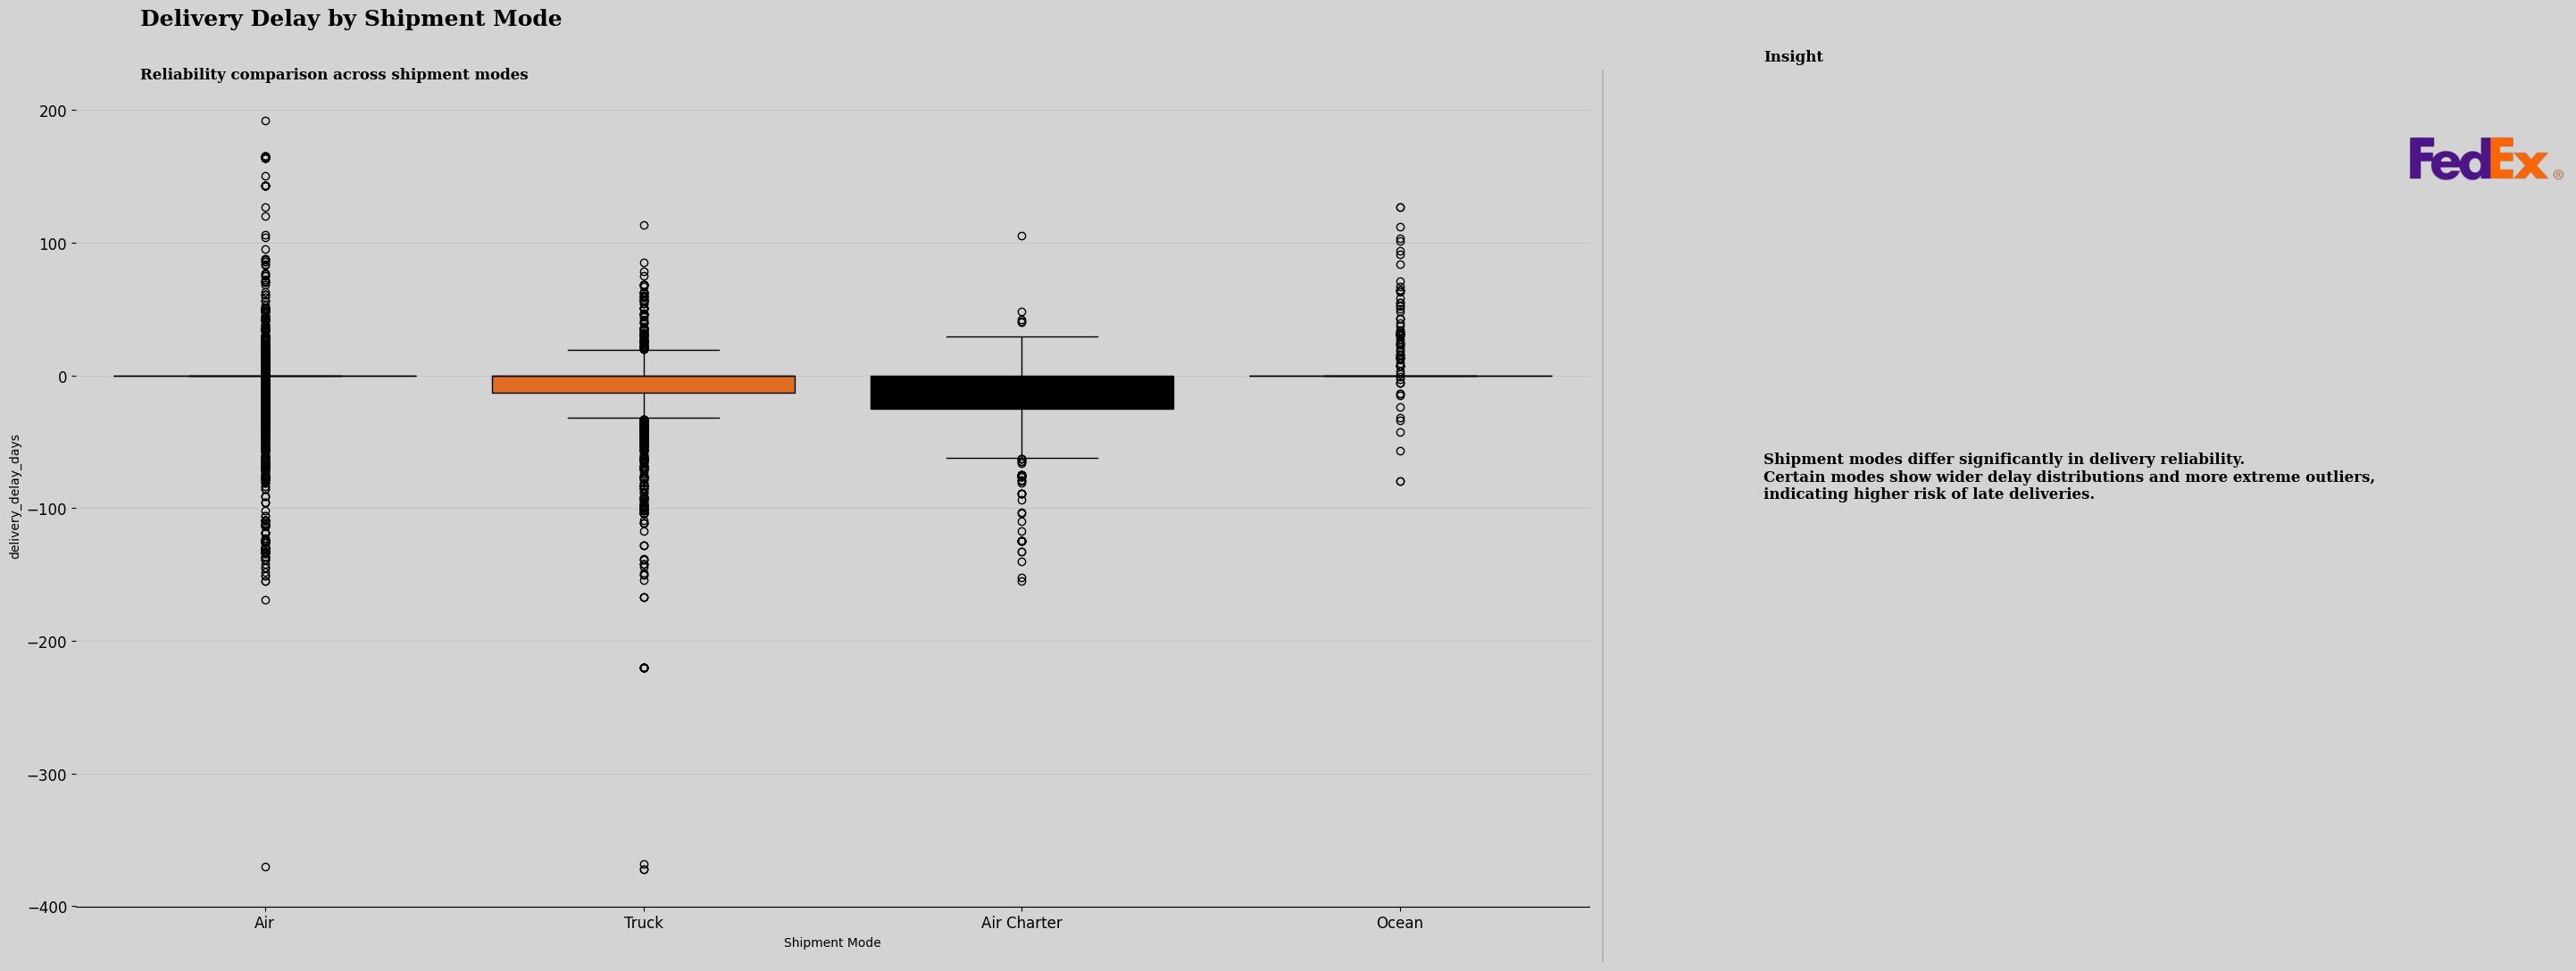

In [67]:
# Chart 11 visualization code

fig, ax = plt.subplots(figsize=(18, 10))

sns.boxplot(
    data=fed_ex,
    x='Shipment Mode',
    y='delivery_delay_days',
    palette=palette,
    ax=ax
)

apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Delivery Delay by Shipment Mode',
    subtitle='Reliability comparison across shipment modes',
    insight_text='''
Shipment modes differ significantly in delivery reliability.
Certain modes show wider delay distributions and more extreme outliers,
indicating higher risk of late deliveries.
'''
)

plt.tight_layout()
plt.show()


Delivery Delay by Freight Cost

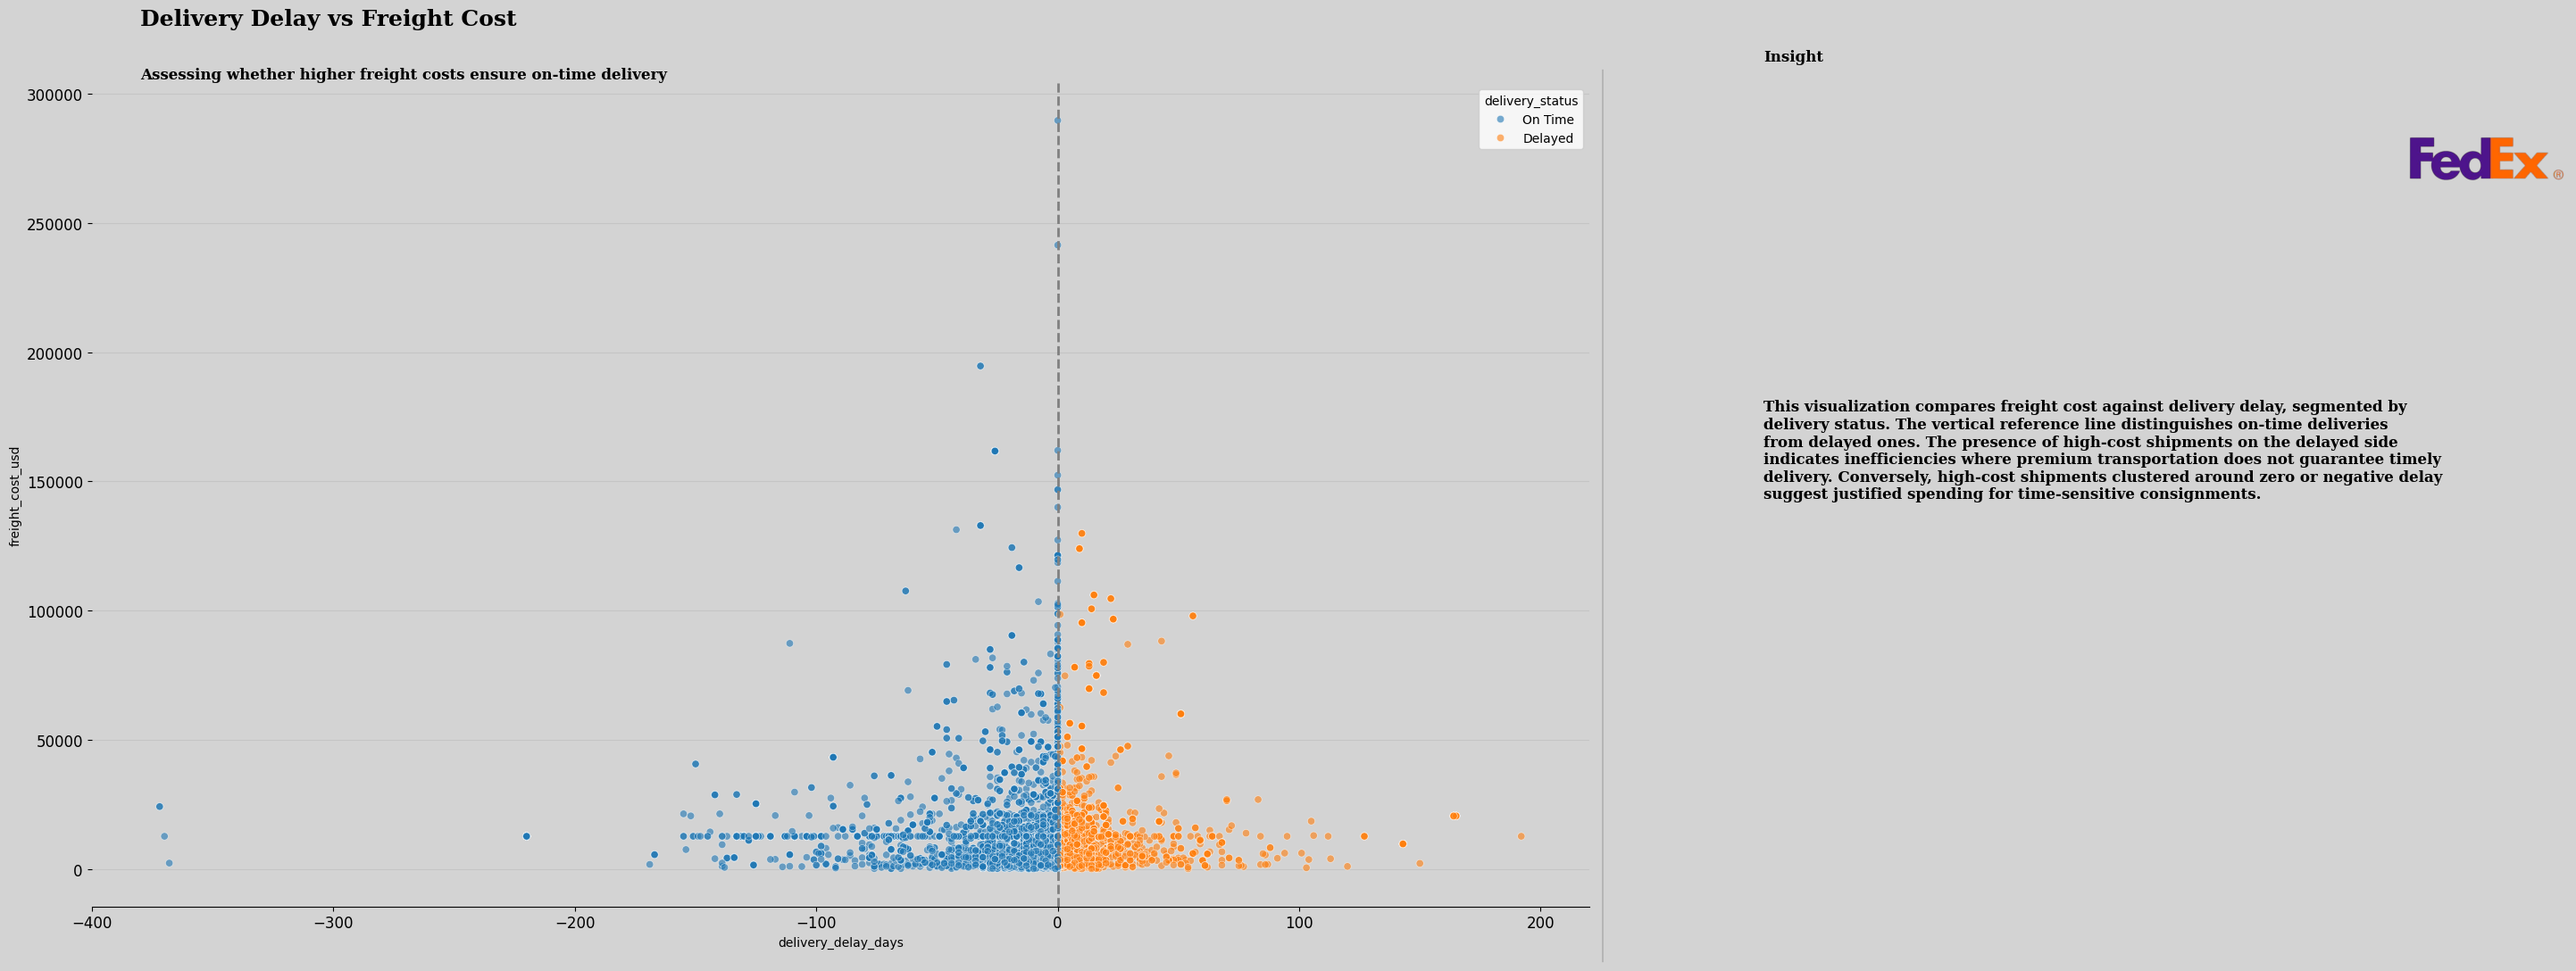

In [68]:
# Chart visualization code: Delivery Delay vs Freight Cost (Enhanced)

fig, ax = plt.subplots(figsize=(18, 10))

sns.scatterplot(
    data=fed_ex,
    x='delivery_delay_days',
    y='freight_cost_usd',
    hue='delivery_status',
    alpha=0.6,
    ax=ax
)

# Reference line for on-time vs delayed
ax.axvline(0, linestyle='--', color='grey', linewidth=2)

apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Delivery Delay vs Freight Cost',
    subtitle='Assessing whether higher freight costs ensure on-time delivery',
    insight_text='''
This visualization compares freight cost against delivery delay, segmented by
delivery status. The vertical reference line distinguishes on-time deliveries
from delayed ones. The presence of high-cost shipments on the delayed side
indicates inefficiencies where premium transportation does not guarantee timely
delivery. Conversely, high-cost shipments clustered around zero or negative delay
suggest justified spending for time-sensitive consignments.
'''
)

plt.tight_layout()
plt.show()

Freight Cost per KG by Shipment Mode (bar)

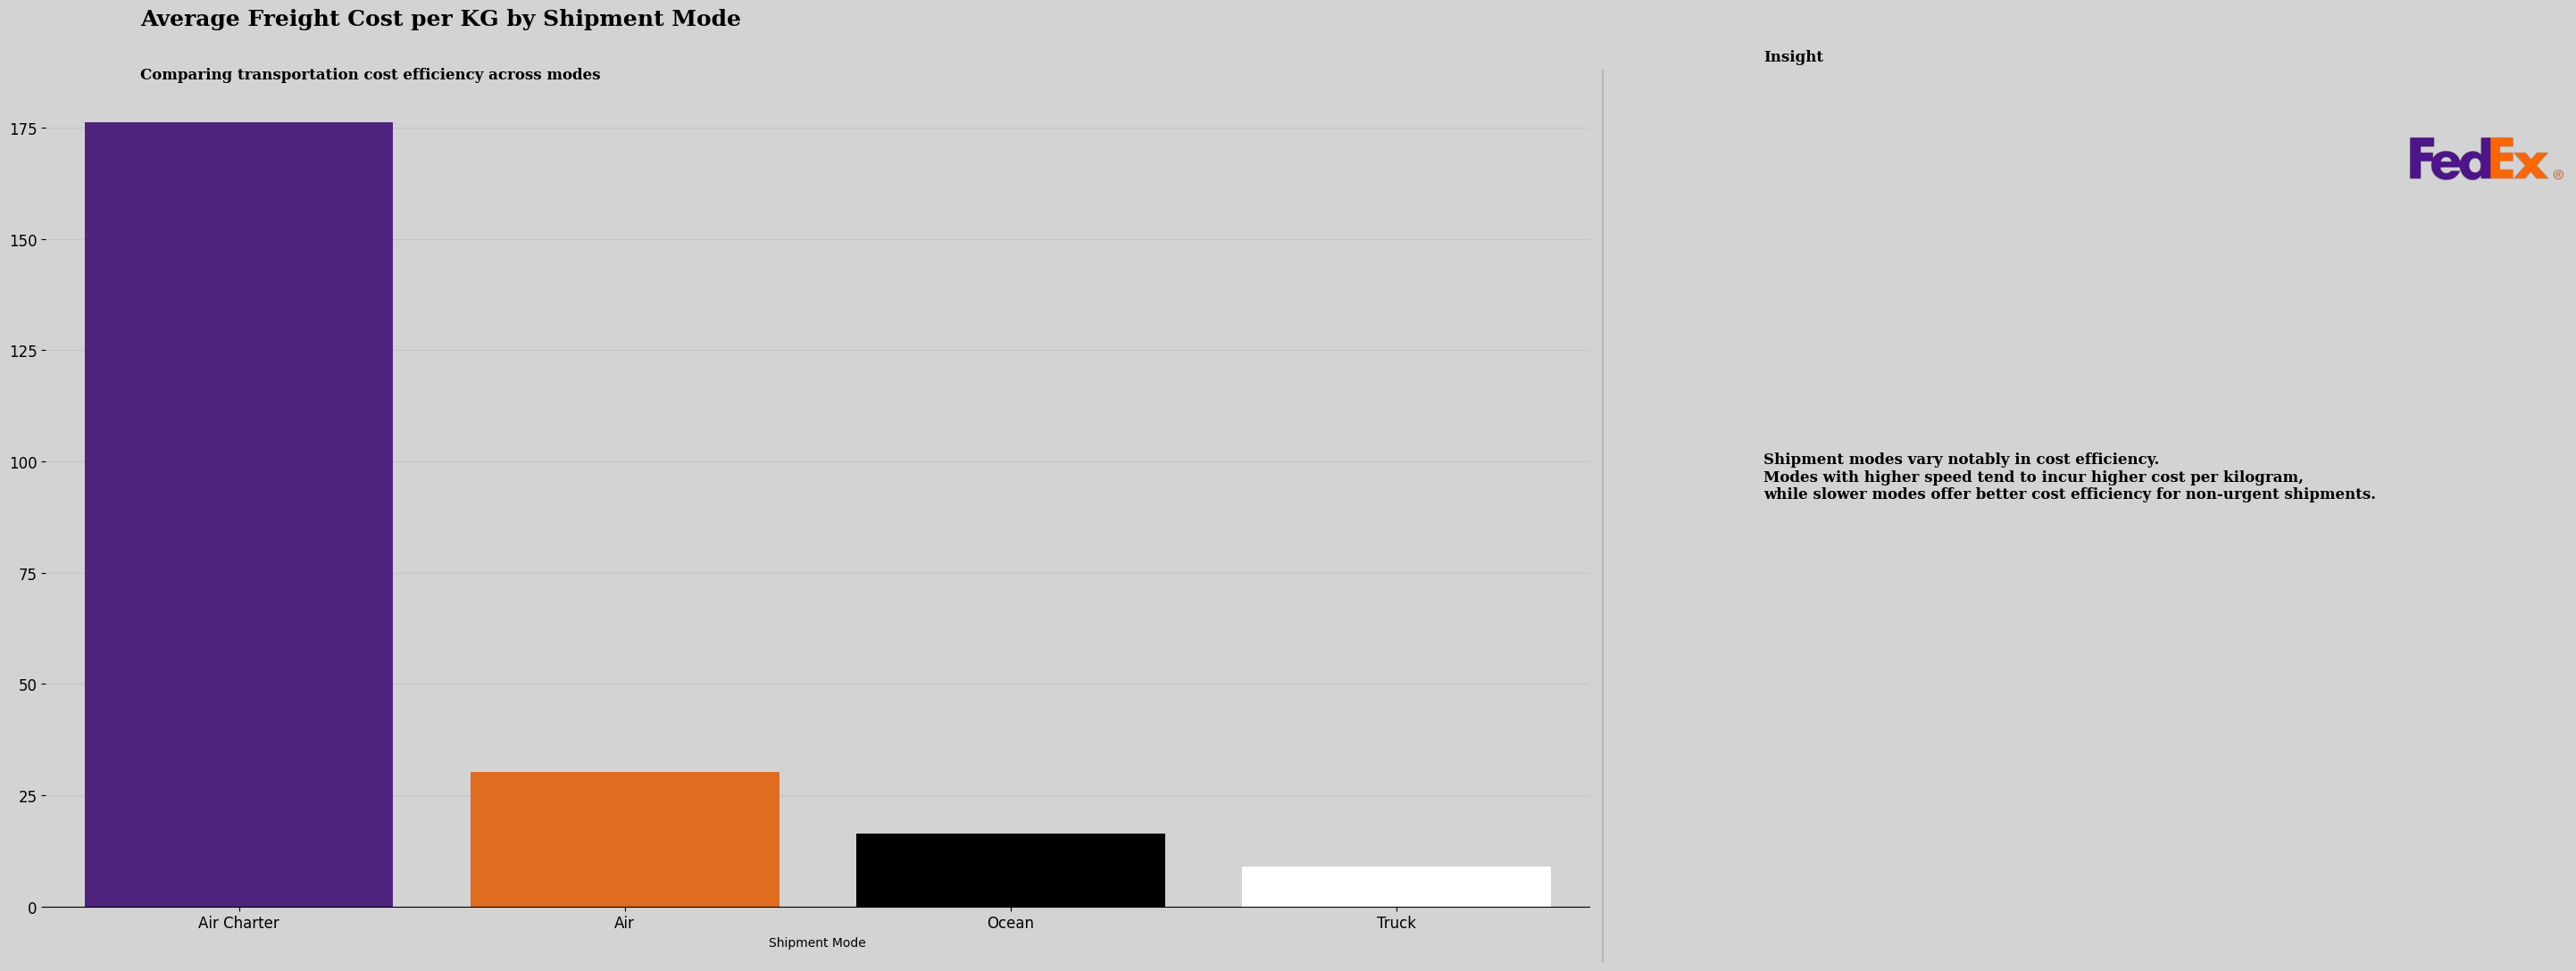

In [69]:
# Chart 12 visualization code

cost_per_kg_by_mode = (
    fed_ex[fed_ex['weight_kgs'] > 0]  # Filter out rows where weight_kgs is 0
    .groupby('Shipment Mode')['freight_cost_per_kg']
          .mean()
          .sort_values(ascending=False)
)

fig, ax = plt.subplots(figsize=(18, 10))

sns.barplot(
    x=cost_per_kg_by_mode.index,
    y=cost_per_kg_by_mode.values,
    palette=palette,
    ax=ax
)

apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Average Freight Cost per KG by Shipment Mode',
    subtitle='Comparing transportation cost efficiency across modes',
    insight_text='''
Shipment modes vary notably in cost efficiency.
Modes with higher speed tend to incur higher cost per kilogram,
while slower modes offer better cost efficiency for non-urgent shipments.
'''
)

plt.tight_layout()
plt.show()

Average Freight Cost by Country (Top 10)

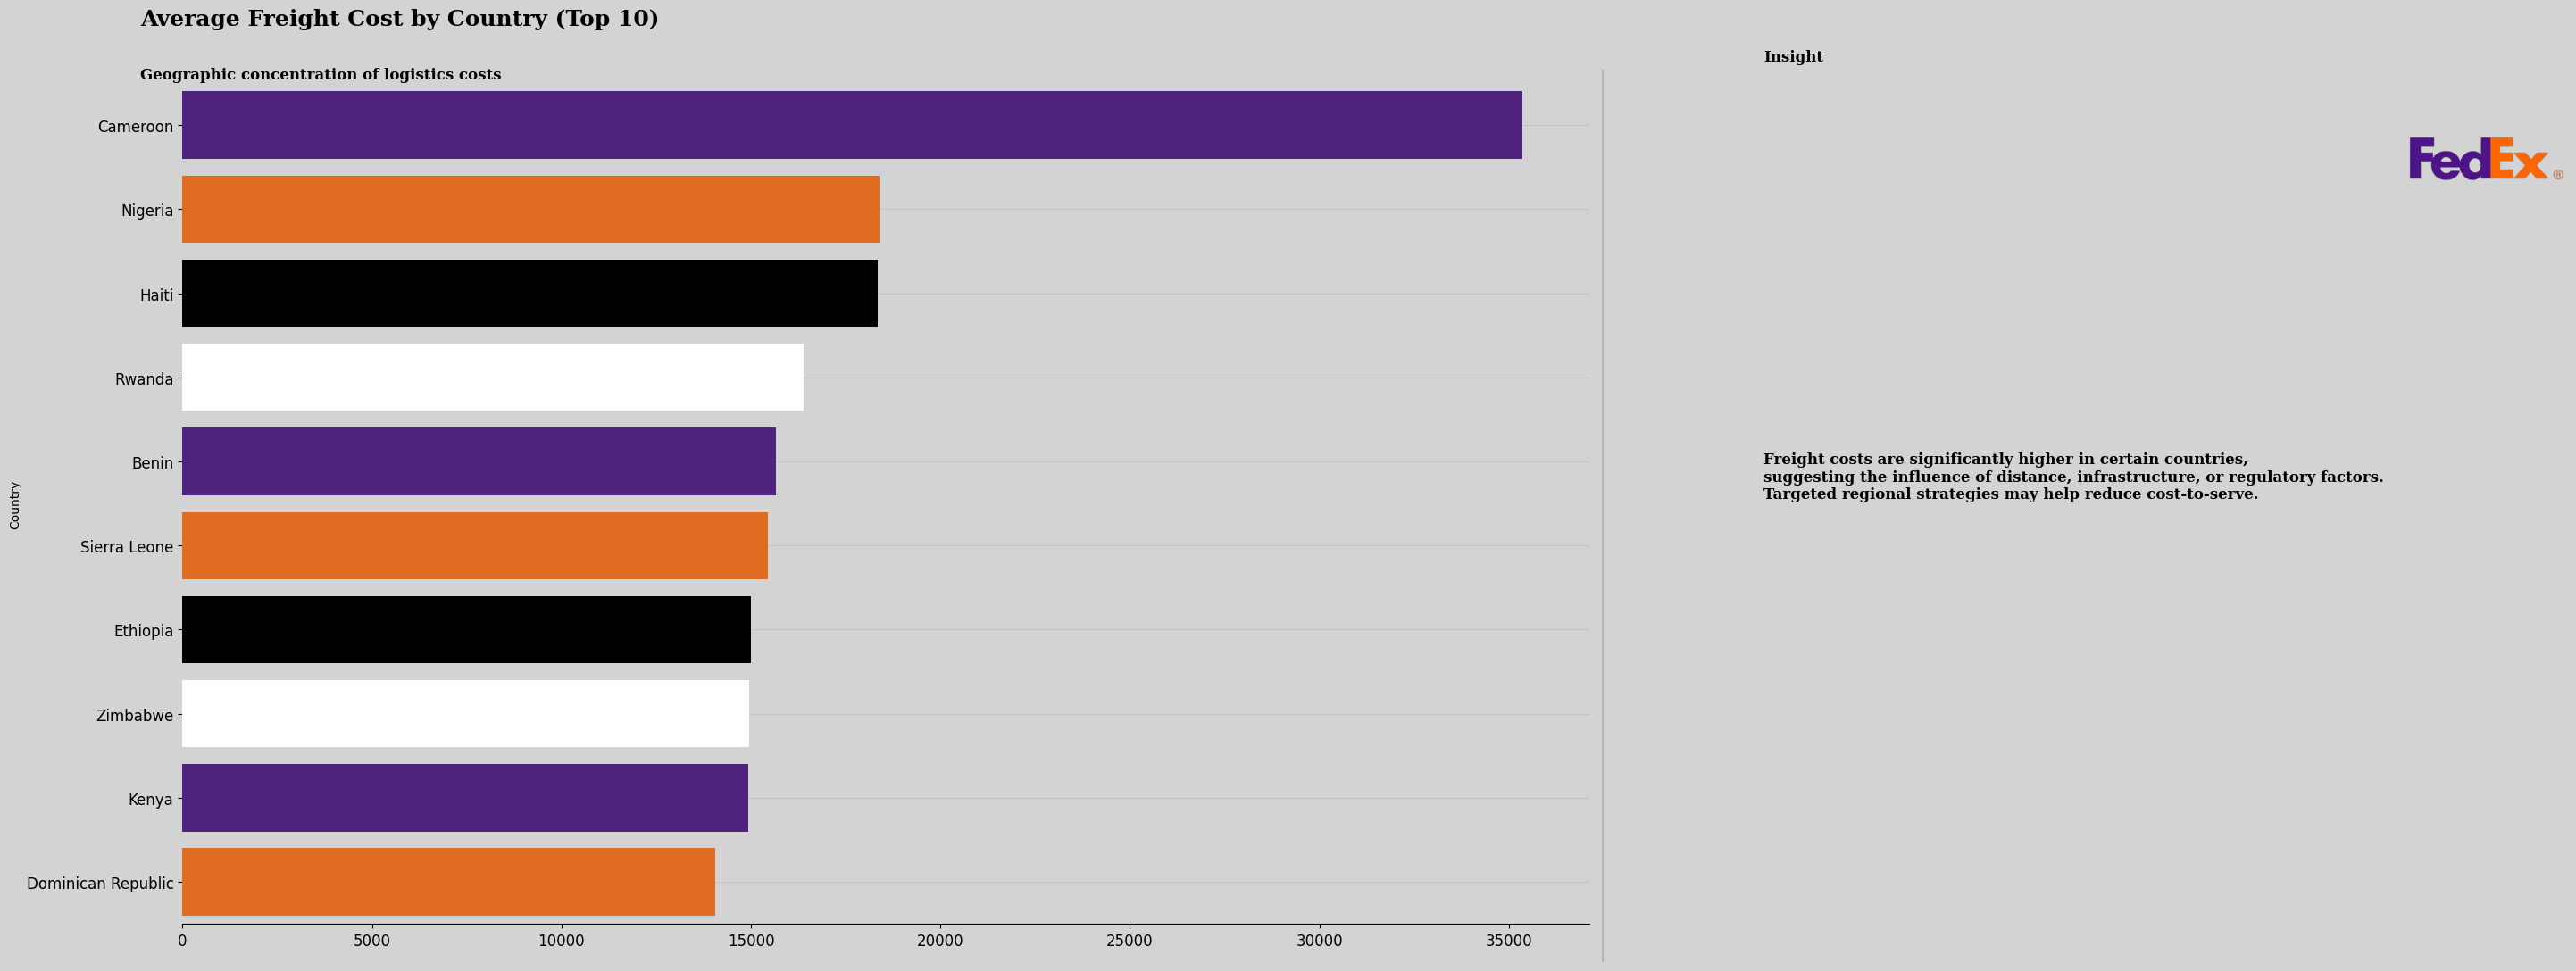

In [70]:
# Chart 13 visualization code

avg_cost_country = (
    fed_ex.groupby('Country')['freight_cost_usd']
          .mean()
          .sort_values(ascending=False)
          .head(10)
)

fig, ax = plt.subplots(figsize=(18, 10))

sns.barplot(
    x=avg_cost_country.values,
    y=avg_cost_country.index,
    palette=palette,
    ax=ax
)

apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Average Freight Cost by Country (Top 10)',
    subtitle='Geographic concentration of logistics costs',
    insight_text='''
Freight costs are significantly higher in certain countries,
suggesting the influence of distance, infrastructure, or regulatory factors.
Targeted regional strategies may help reduce cost-to-serve.
'''
)

plt.tight_layout()
plt.show()


Freight Cost by Product Group (box plot)

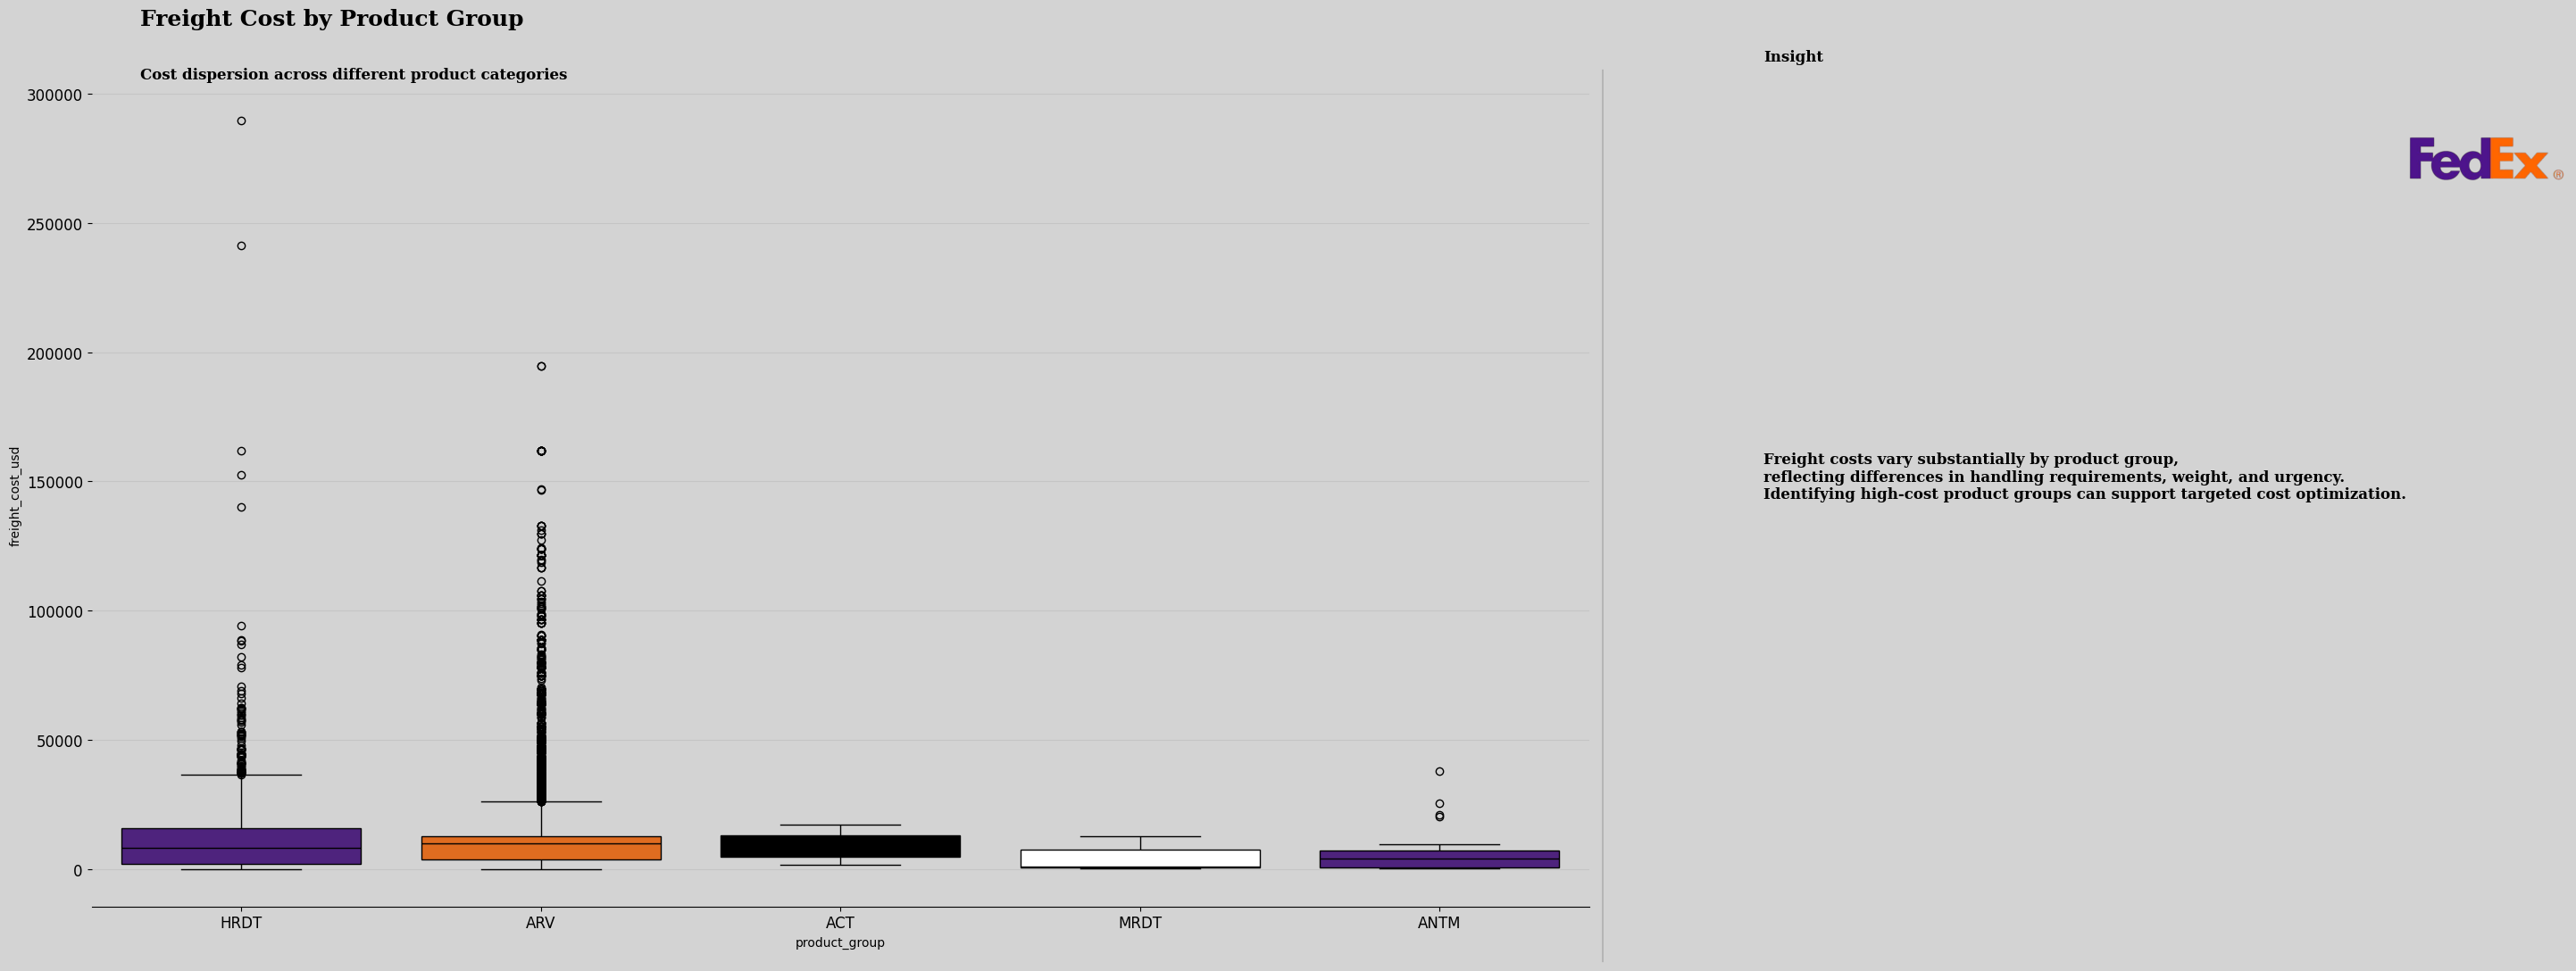

In [71]:
# Chart 15 visualization code

fig, ax = plt.subplots(figsize=(18, 10))

sns.boxplot(
    data=fed_ex,
    x='product_group',
    y='freight_cost_usd',
    palette=palette,
    ax=ax
)

apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Freight Cost by Product Group',
    subtitle='Cost dispersion across different product categories',
    insight_text='''
Freight costs vary substantially by product group,
reflecting differences in handling requirements, weight, and urgency.
Identifying high-cost product groups can support targeted cost optimization.
'''
)

plt.tight_layout()
plt.show()


Shipment Mode vs Delivery Status (stacked bar)

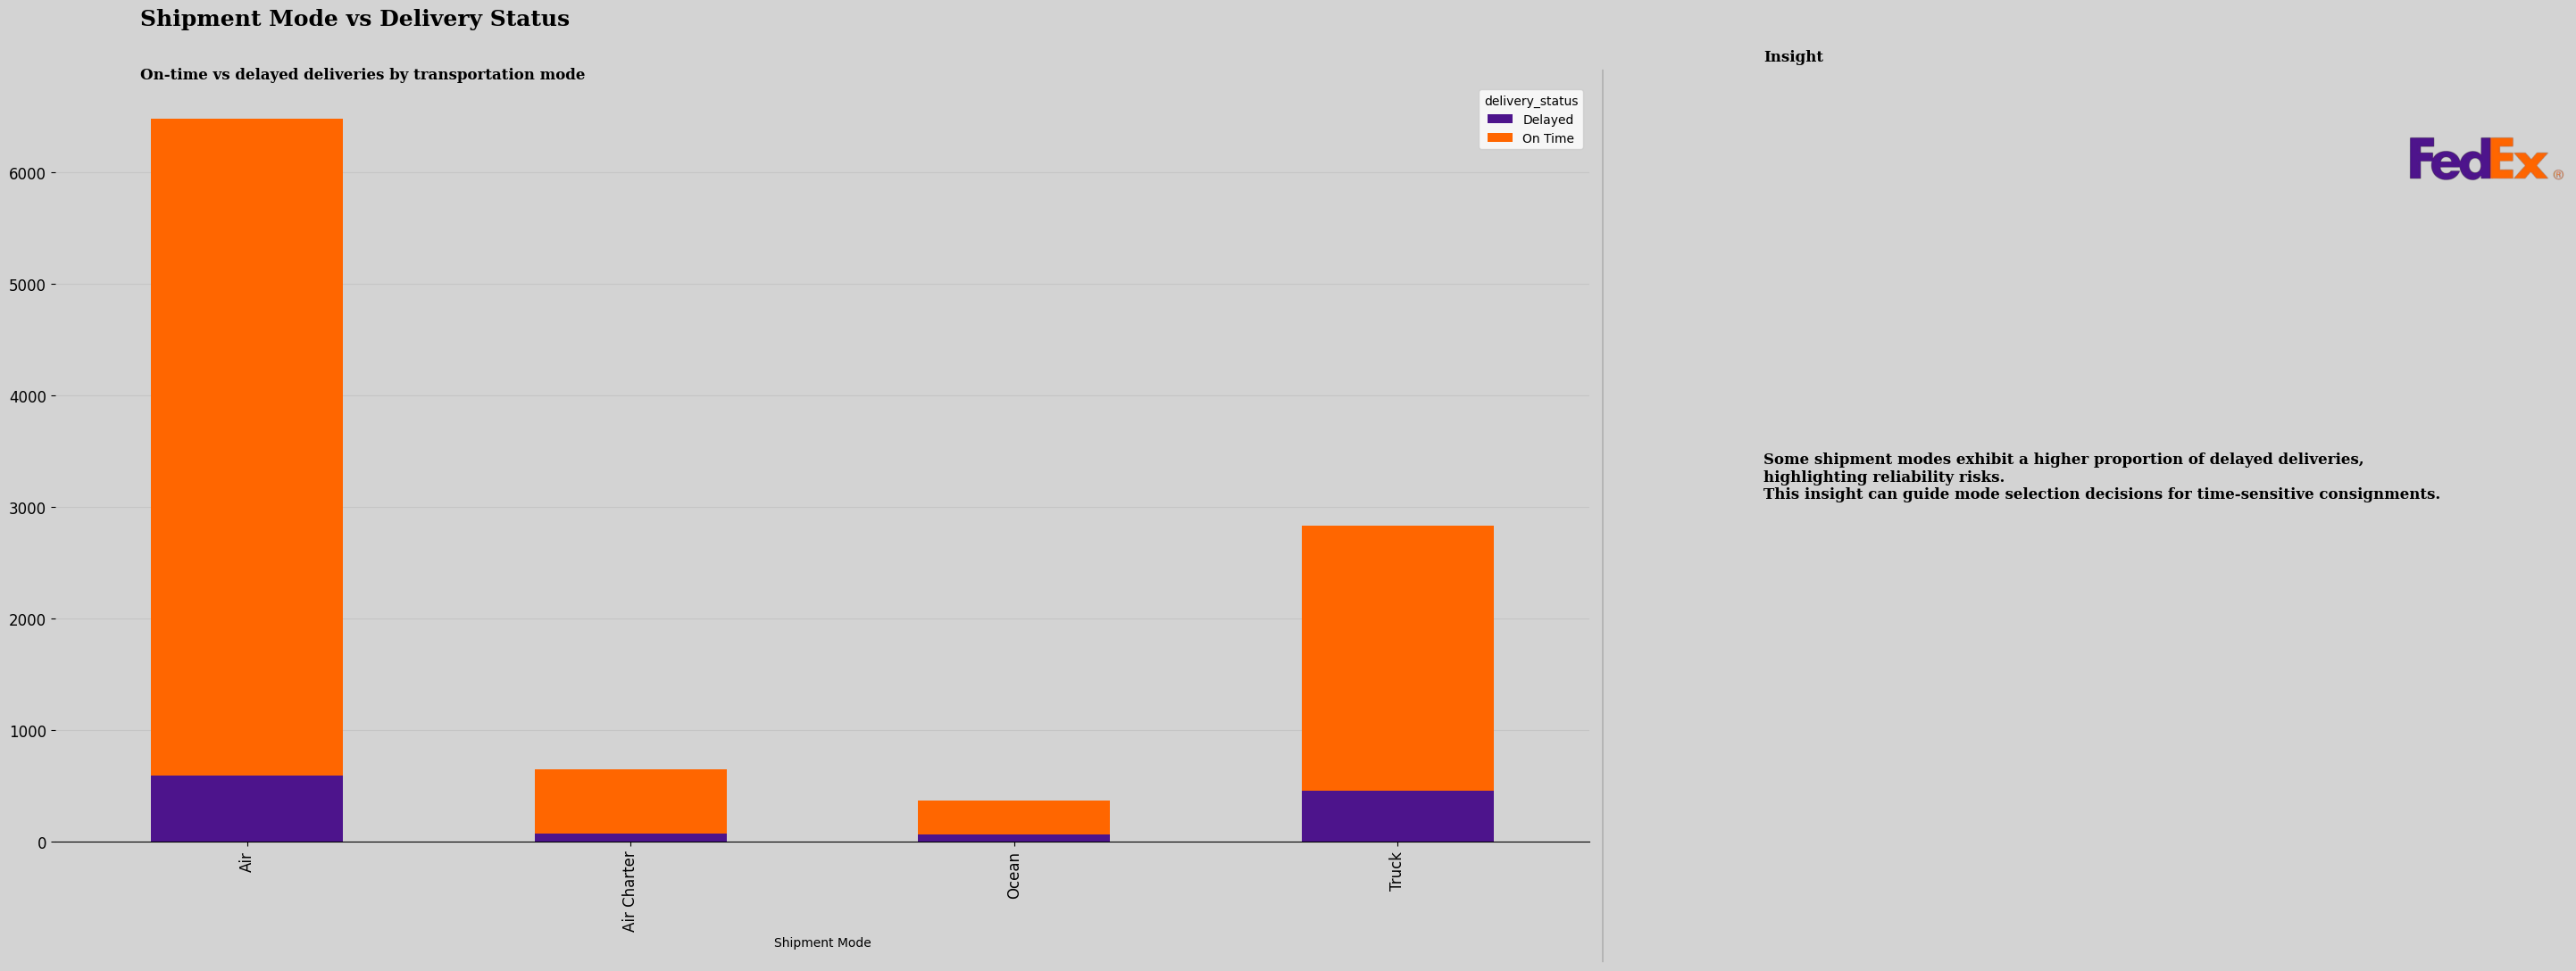

In [72]:
# Chart 16 visualization code

mode_status_counts = (
    fed_ex.groupby(['Shipment Mode', 'delivery_status'])
          .size()
          .unstack(fill_value=0)
)

fig, ax = plt.subplots(figsize=(18, 10))

mode_status_counts.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=palette[:mode_status_counts.shape[1]]
)

apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Shipment Mode vs Delivery Status',
    subtitle='On-time vs delayed deliveries by transportation mode',
    insight_text='''
Some shipment modes exhibit a higher proportion of delayed deliveries,
highlighting reliability risks.
This insight can guide mode selection decisions for time-sensitive consignments.
'''
)

plt.tight_layout()
plt.show()


### Multi-Variate Analysis

 Freight cost by shipment mode, fulfill method, and country

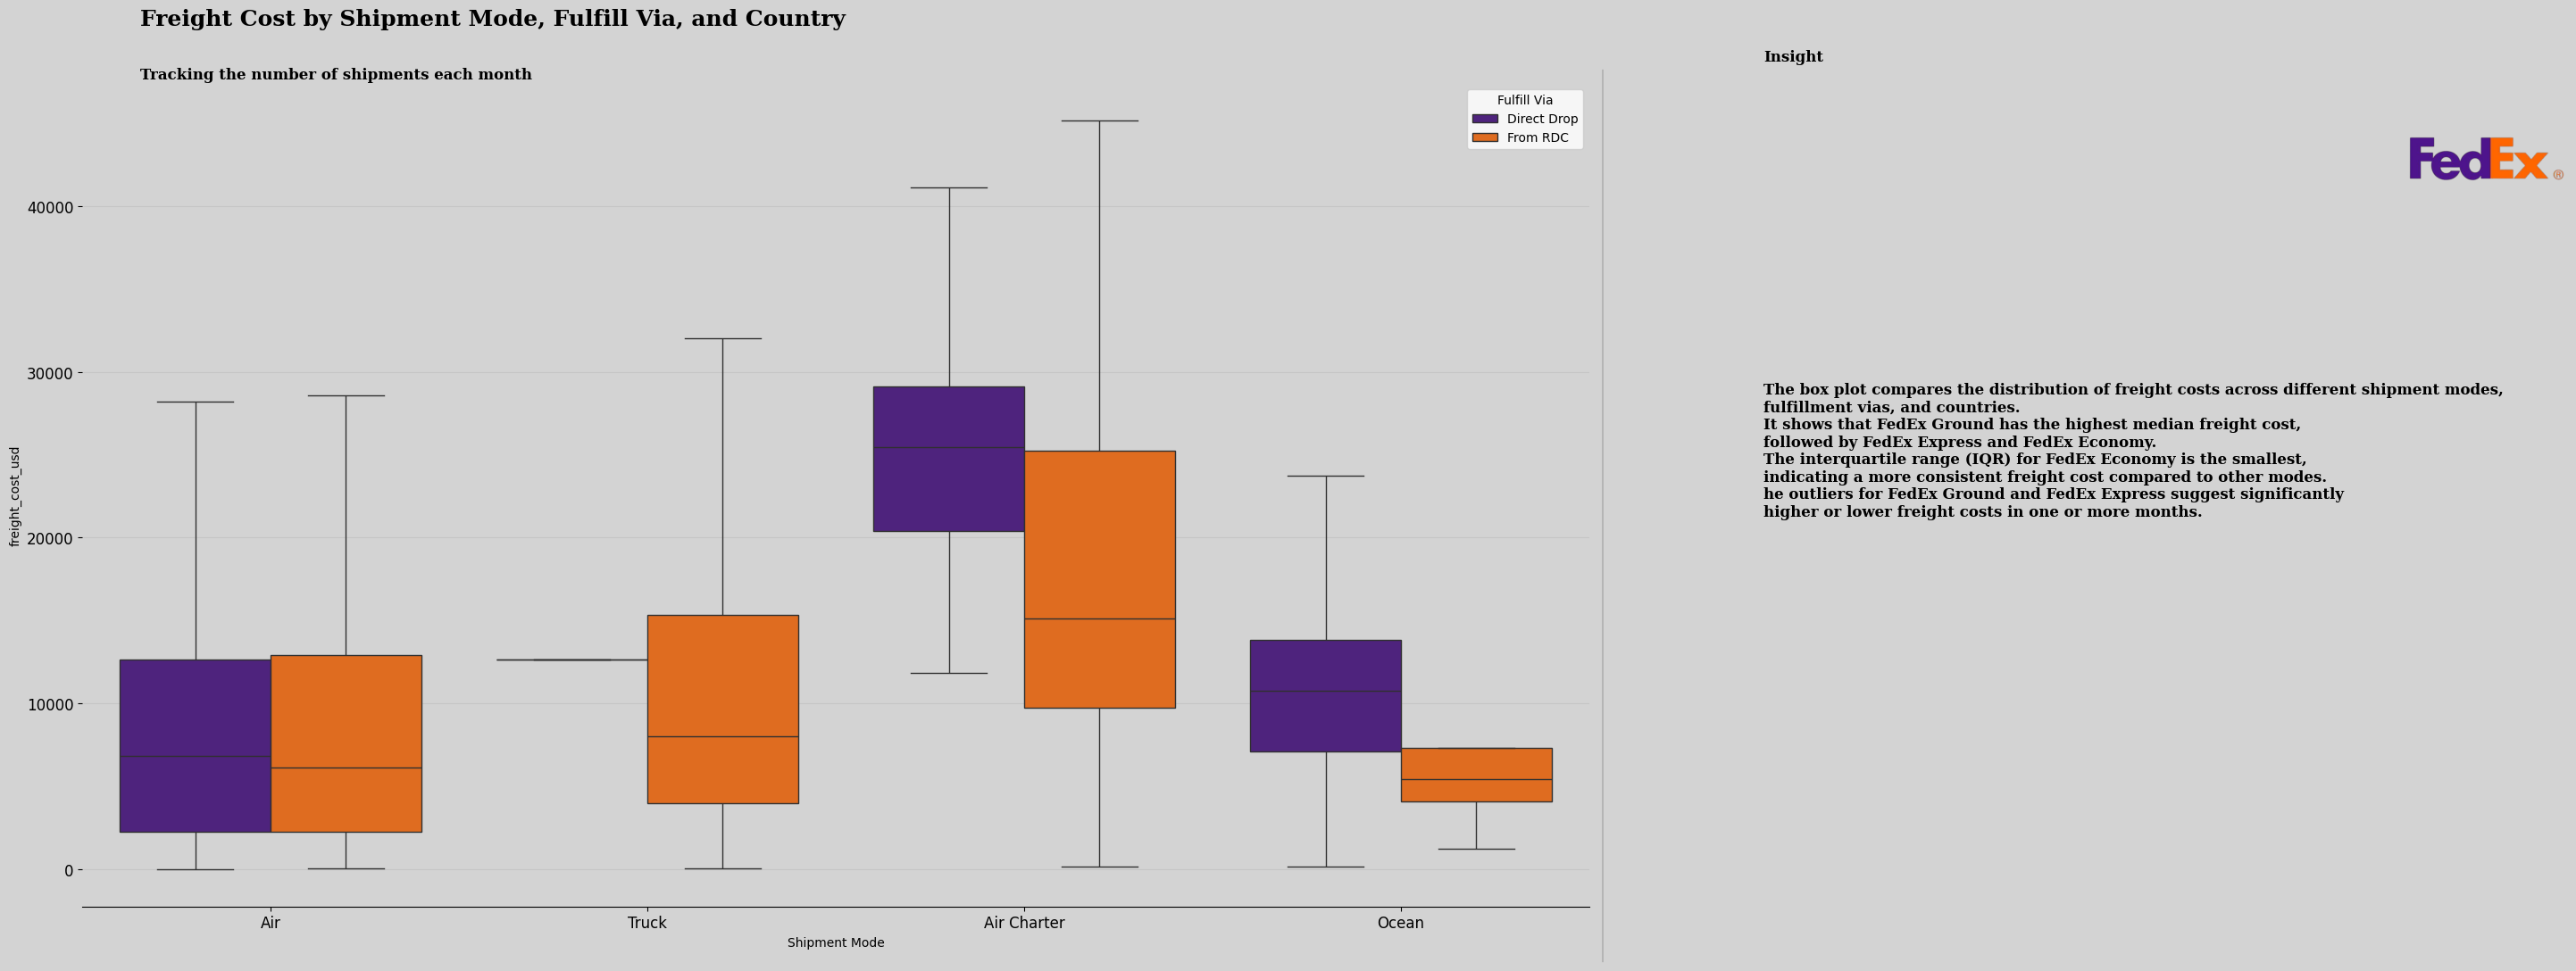

In [73]:
# Boxplot for freight cost by shipment mode, fulfill method, and country
fig,ax = plt.subplots(1,1,figsize = (18,10))
sns.boxplot(
    x='Shipment Mode',
    y='freight_cost_usd',
    hue='Fulfill Via',  # Add segmentation by fulfill method
    data=fed_ex,  # Replace with your dataset
    ax=ax,
    palette=palette,
    showfliers = False
)

apply_chart_styling(ax=ax, fig=fig, title='Freight Cost by Shipment Mode, Fulfill Via, and Country', subtitle='Tracking the number of shipments each month', insight_text='''The box plot compares the distribution of freight costs across different shipment modes,
fulfillment vias, and countries.
It shows that FedEx Ground has the highest median freight cost,
followed by FedEx Express and FedEx Economy.
The interquartile range (IQR) for FedEx Economy is the smallest,
indicating a more consistent freight cost compared to other modes.
he outliers for FedEx Ground and FedEx Express suggest significantly
higher or lower freight costs in one or more months.''')

# Display the plot
plt.tight_layout()
plt.show()

Delivery Delay by Shipment Mode and Fulfillment Method

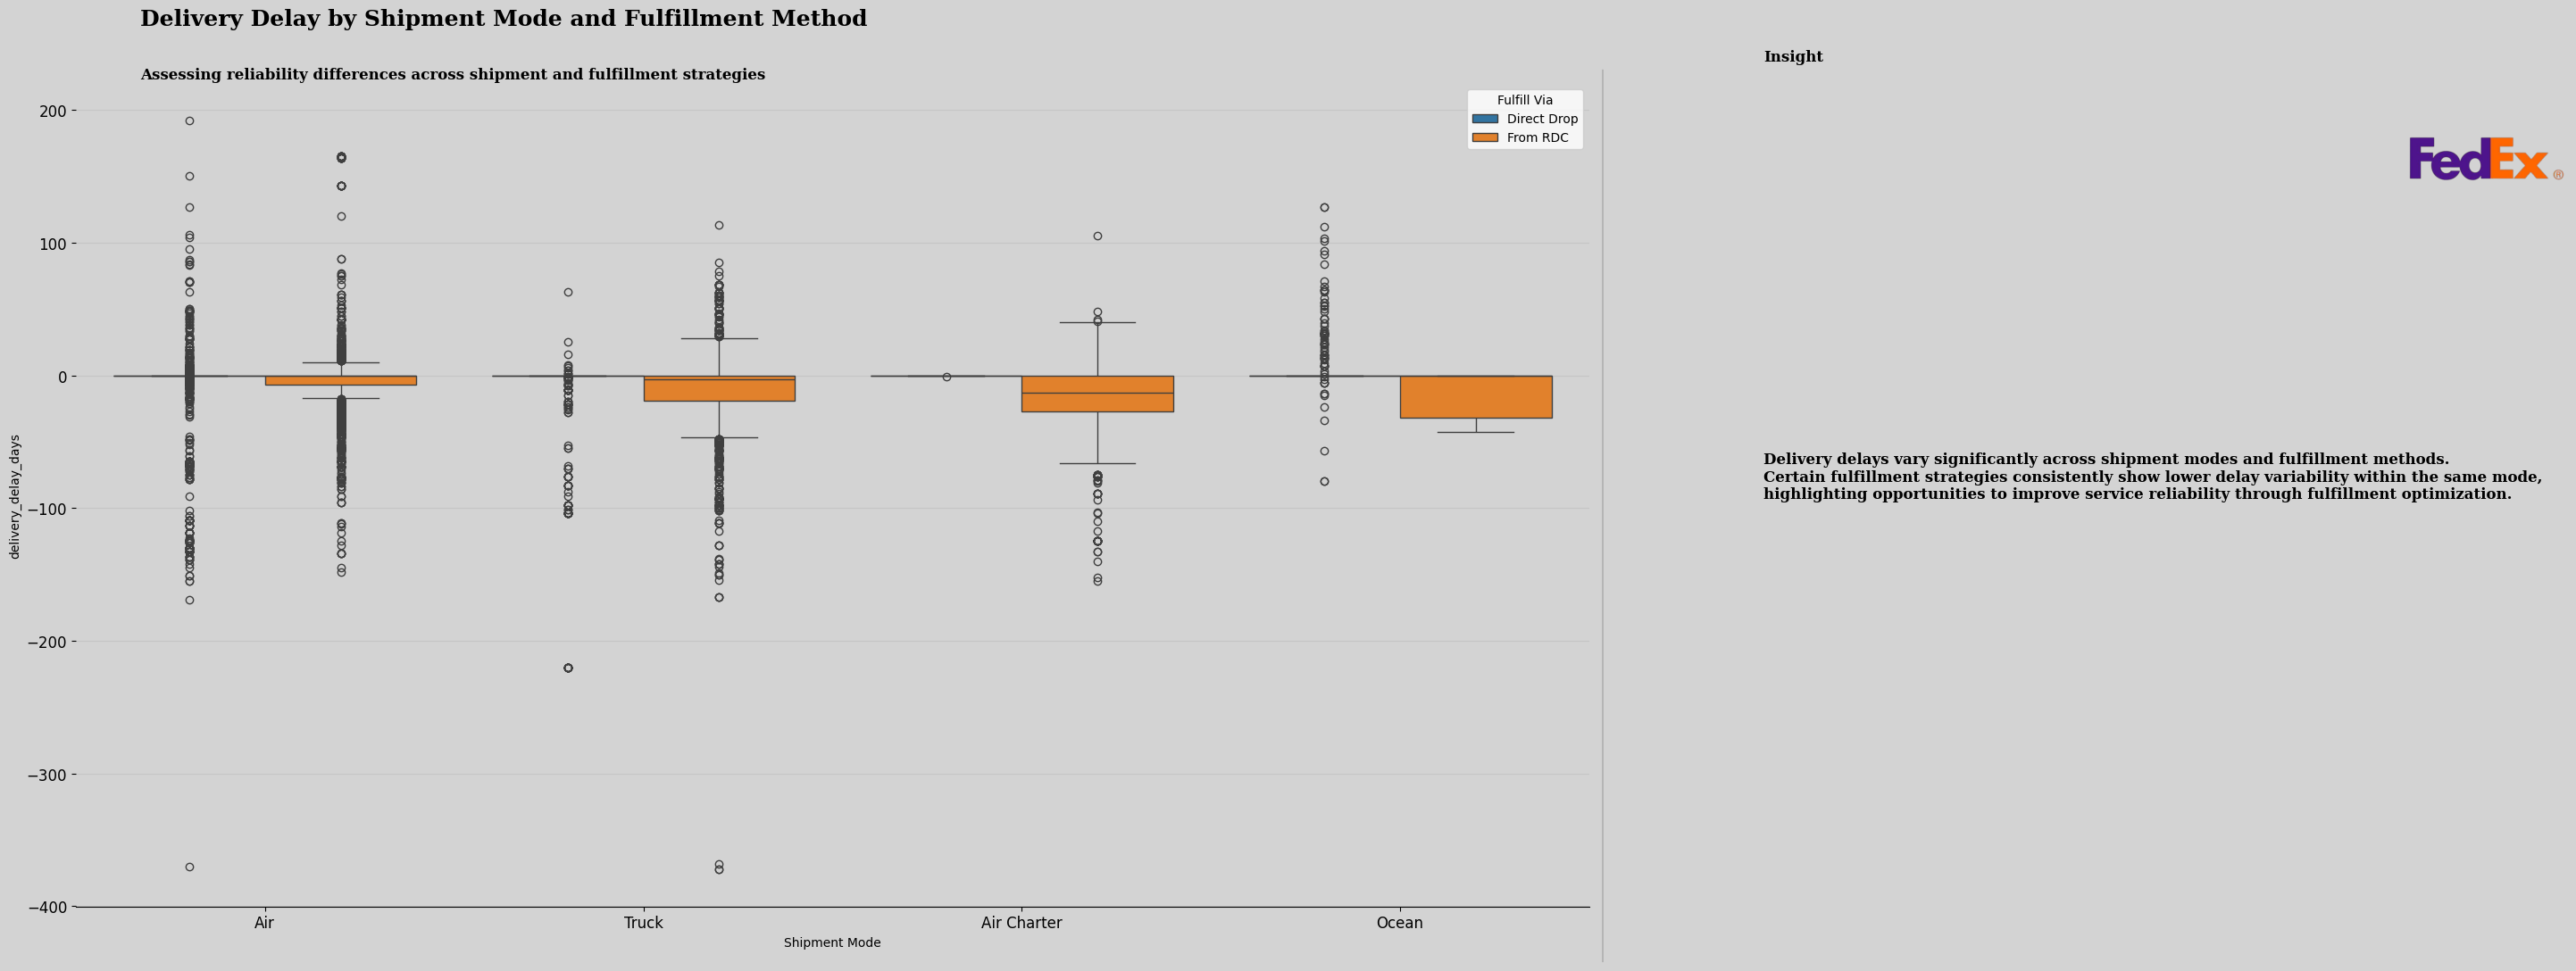

In [74]:
#Delivery Delay by Shipment Mode and Fulfillment Method

fig, ax = plt.subplots(figsize=(18, 10))

sns.boxplot(
    data=fed_ex,
    x='Shipment Mode',
    y='delivery_delay_days',
    hue='Fulfill Via',
    ax=ax
)

apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Delivery Delay by Shipment Mode and Fulfillment Method',
    subtitle='Assessing reliability differences across shipment and fulfillment strategies',
    insight_text='''
Delivery delays vary significantly across shipment modes and fulfillment methods.
Certain fulfillment strategies consistently show lower delay variability within the same mode,
highlighting opportunities to improve service reliability through fulfillment optimization.
'''
)

plt.tight_layout()
plt.show()


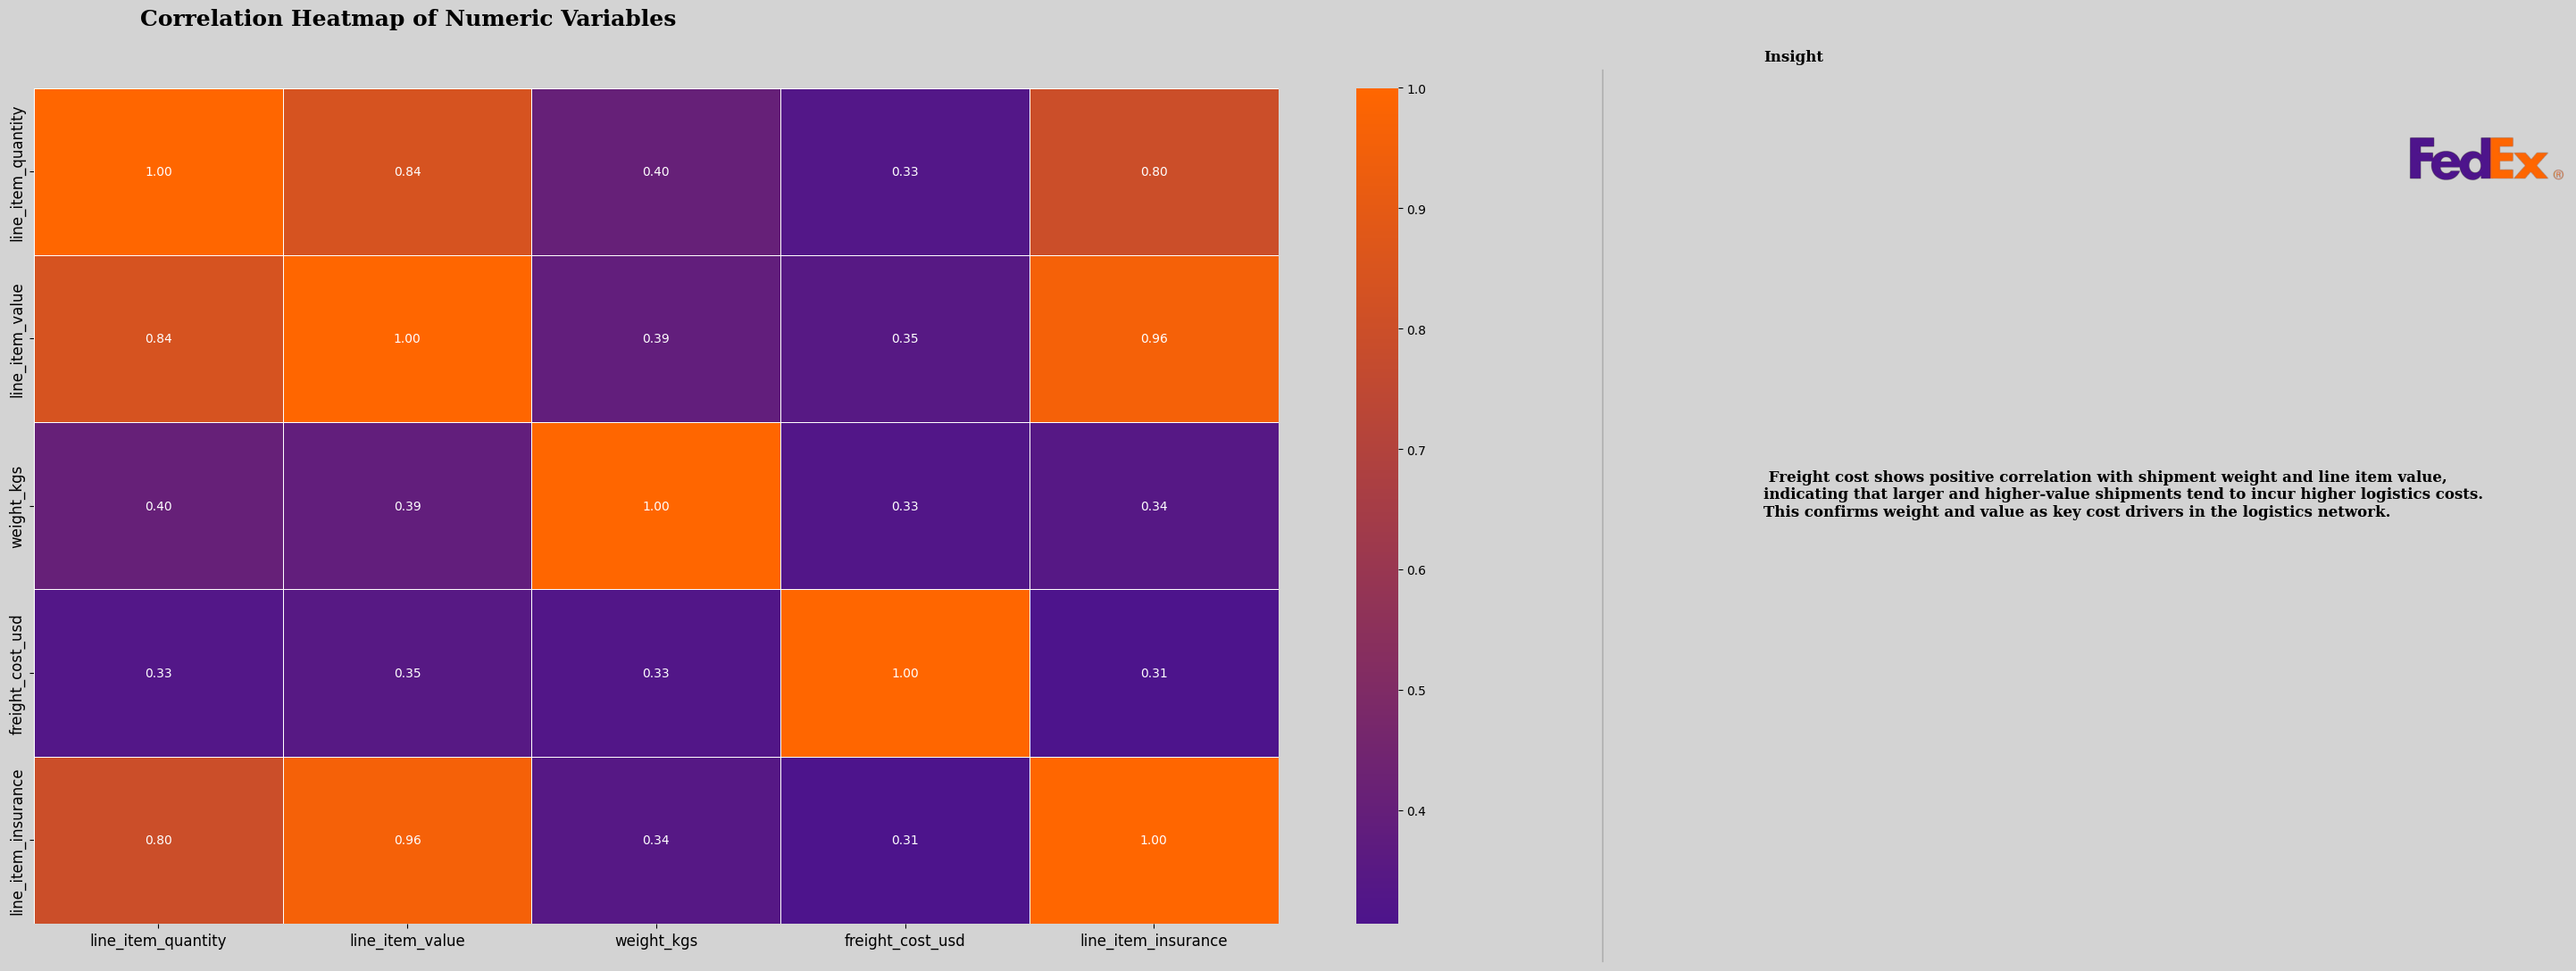

In [75]:
# Define the colors in hex
colors = ['#4d148c', '#ff6600']

# Create the colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)

correlation_matrix = fed_ex[numeric_cols].corr()

# Create a heatmap
fig,ax = plt.subplots(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap= custom_cmap, fmt='.2f', linewidths=0.5)
apply_chart_styling(ax = ax ,fig = fig , title = 'Correlation Heatmap of Numeric Variables',subtitle = '',insight_text = ''' Freight cost shows positive correlation with shipment weight and line item value,
indicating that larger and higher-value shipments tend to incur higher logistics costs.
This confirms weight and value as key cost drivers in the logistics network.''')
plt.tight_layout()
plt.show()

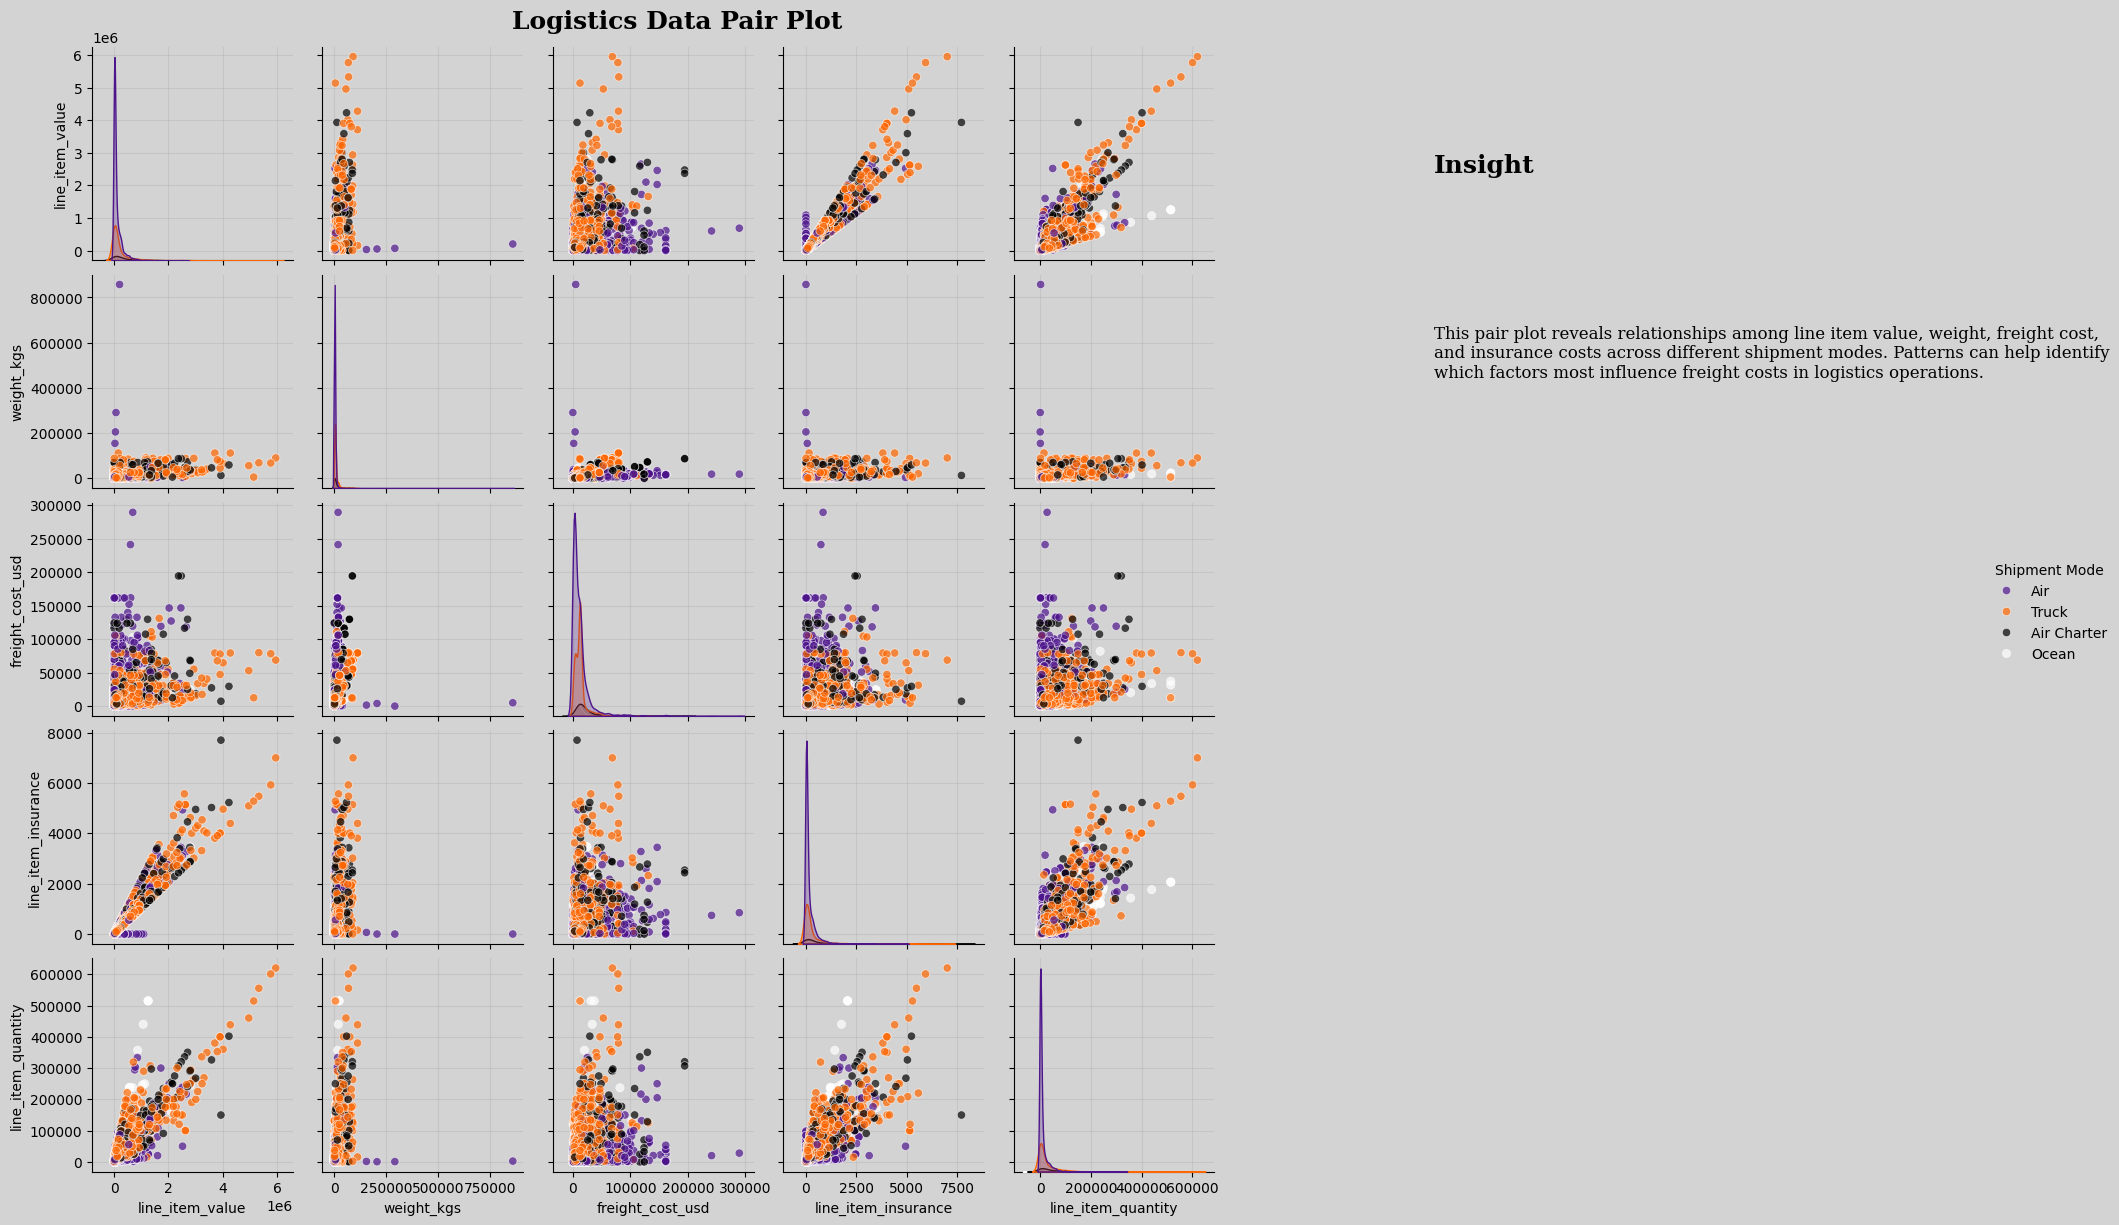

<Figure size 640x480 with 0 Axes>

In [76]:
numeric_columns = ['line_item_value', 'weight_kgs', 'freight_cost_usd', 'line_item_insurance', 'line_item_quantity']

# Drop rows with missing values in the selected columns
df_pairplot = fed_ex[numeric_columns + ['Shipment Mode']].dropna()


# Create pair plot with shipment mode as hue
fig = sns.pairplot(df_pairplot,
                   hue='Shipment Mode',
                   palette=palette,
                   diag_kind='kde',  # Kernel density estimate on the diagonal
                   plot_kws={'alpha': 0.7})  # Transparency of points

plt.figure().set_facecolor('#D3D3D3')

# Customize the appearance of each subplot
for ax in fig.axes.flatten():
    ax.set_facecolor('#D3D3D3')
    ax.grid(axis='both', linestyle='-', alpha=0.4)  # Light gridlines
    ax.set_axisbelow(True)

# Add a title to the entire figure
fig.fig.suptitle('Logistics Data Pair Plot', fontsize=18, fontweight='bold', fontfamily='serif')
fig.fig.subplots_adjust(top=0.95)

# Add custom insight text outside the plot
fig.fig.text(1.05, 0.85, 'Insight', fontsize=18, fontweight='bold', fontfamily='serif')
fig.fig.text(1.05, 0.67, '''
This pair plot reveals relationships among line item value, weight, freight cost,
and insurance costs across different shipment modes. Patterns can help identify
which factors most influence freight costs in logistics operations.
''', fontsize=12, fontfamily='serif')

fig.fig.patch.set_facecolor('#D3D3D3')
# Display the plot
plt.show()

## **5. Solution to Business Objective**

### Solution to Business Objective and Recommendations

Based on the analysis, the following actions are recommended to help FedEx achieve its business objectives:

1. **Optimize Shipment Mode Selection:**  
   Freight cost and delivery performance vary significantly across shipment modes. High-cost modes should be reserved for time-sensitive consignments where faster delivery is consistently achieved, while cost-efficient modes should be prioritized for non-urgent shipments.

2. **Improve Fulfillment Strategy Alignment:**  
   The interaction between shipment mode and fulfillment method shows notable differences in cost variability and delivery delays. Standardizing best-performing fulfillment strategies within each shipment mode can improve reliability and reduce unnecessary cost escalation.

3. **Address High-Cost and High-Delay Regions:**  
   Certain countries and regions consistently exhibit higher freight costs and longer delivery delays. These areas should be reviewed for infrastructure constraints, vendor dependencies, or routing inefficiencies to reduce regional cost-to-serve.

4. **Vendor Performance Optimization:**  
   Freight cost distributions differ significantly across vendors, even under similar shipment modes. FedEx should use these insights to renegotiate contracts, reallocate volumes, or introduce performance-based vendor evaluation metrics.

5. **Focus on Reliability-Cost Trade-offs:**  
   The relationship between freight cost and delivery delay indicates that higher spending does not always guarantee faster delivery. Monitoring cost-versus-reliability performance can help eliminate inefficient premium spending while maintaining service levels.

Implementing these recommendations can enhance on-time delivery performance, improve cost efficiency, and strengthen overall logistics network reliability.


# **Conclusion**

## Conclusion

This analysis demonstrates how data-driven exploration of logistics operations can uncover meaningful insights into delivery performance, cost drivers, and operational inefficiencies within FedEx’s supply chain. By combining structured EDA with multivariate analysis, the study highlights the impact of shipment modes, fulfillment strategies, vendors, and regional factors on freight cost and delivery delays.

The findings emphasize that effective logistics optimization requires balancing cost efficiency with service reliability rather than relying solely on higher transportation spending. By leveraging these insights, FedEx can improve shipment planning, optimize vendor selection, and reduce cost-to-serve while maintaining high service standards.

Overall, this project provides a scalable analytical framework that can be extended to continuous monitoring and strategic decision-making across global logistics operations.
